<a href="https://colab.research.google.com/github/abhikr11/Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1**   - Abhijeet Kumar

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/abhikr11/Retail_Sales_Prediction

# **Problem Statement**


Dirk Rossmann GmbH, commonly referred to as Rossmann, is one of the largest drug store chains in Europe. Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

**Business Objective :**

 The task is to do exploratory analysis of 1115 Rossmann stores sales data and build a Machine Learning Model to predict daily sales for up to six weeks in advance.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#importing important libraries

#libraries for data wrangling
import numpy as np
import pandas as pd

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for Hypothesis Testing
from statsmodels.stats import weightstats as stests
from scipy.stats import pearsonr

#Calculate vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

#libraies for scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



### Dataset Loading

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading dataset
#load Rossmann Stores Sales Data
sales_df = pd.read_csv('/content/drive/MyDrive/DataScience/Projects/Capstone/Regression/Rossmann Stores Data.csv')

#load store details data
store_df = pd.read_csv('/content/drive/MyDrive/DataScience/Projects/Capstone/Regression/store.csv')

<ipython-input-3-e9d1abe1557e>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv('/content/drive/MyDrive/DataScience/Projects/Capstone/Regression/Rossmann Stores Data.csv')


### Dataset First View

In [4]:
# code to see all the features
pd.set_option('display.max_columns', None)

In [5]:
# Dataset First Look
#first 5 rows of sales data
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
#last 5 rows of sales data
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
#first 5 rows of store data
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
#last 5 rows of store data
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
#shape of sales data
sales_df.shape

(1017209, 9)

Sales Dataset have total 1017209 Rows and 9 Columns.

In [10]:
#shape of store data
store_df.shape

(1115, 10)

Store Dataset have total 1115 Rows and 10 Columns.

### Dataset Information

In [11]:
# Dataset Info
#Info of Sales dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
#Info of Store dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
#Duplicate rows count of sales dataset
sales_df.duplicated().sum()

0

No duplicate rows in Sales Dataset

In [14]:
#Duplicate rows count of store dataset
store_df.duplicated().sum()

0

No duplicate rows in Store Dataset

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
# Null values in Sales Dataset
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [16]:
# Null values in Store Dataset
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There is no null values in Sales Dataset. So, we will visualize only store dataset.

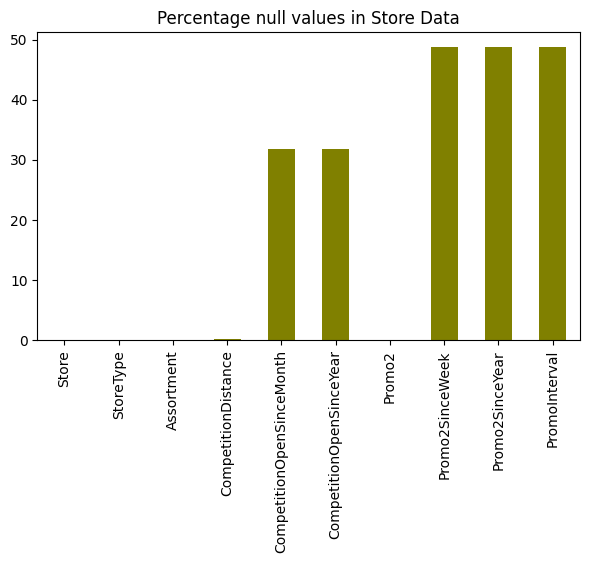

In [17]:
# Visualizing the missing values
# Visualize the percentage of null values in Store Data
percent_null = store_df.isnull().sum() / len(store_df) *100

#define figure size
plt.figure(figsize = (7,4))

#plot bar chart
percent_null.plot(kind ='bar', color='olive')

#title
plt.title('Percentage null values in Store Data')

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=90, size=10)

# Display the plot
plt.show()

'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' has almost 50% null data.

'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' has almost 30% null data.

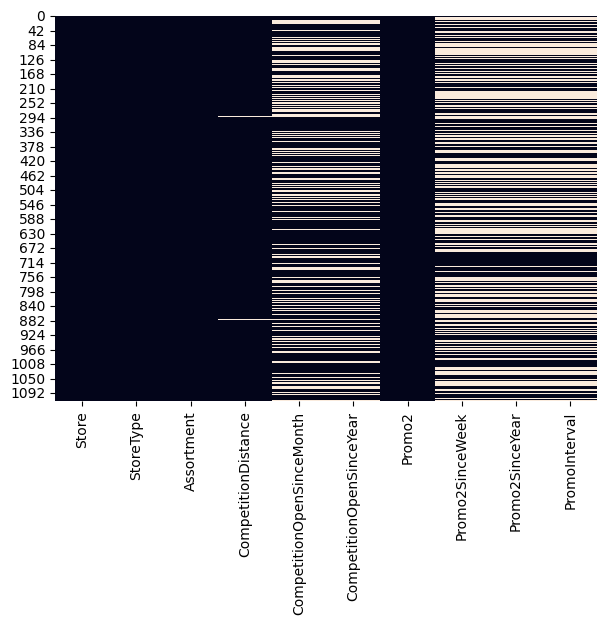

In [18]:
# Visualizing the null values using heatmap
# define figure size
plt.figure(figsize=(7,5))

#plot heatmap
sns.heatmap(store_df.isnull(), cbar=False)

#Display the plot
plt.show()

### What did you know about your dataset?

**Sales Dataset**
*   Have total 1017209 Rows and 9 Columns.
*   Data Type of 'Date' column is object, need to change it to datetime. 'StateHoliday' data type is object but it has mixed data like int and str, need to check.
*   No duplicate rows in Sales Dataset.
*   No Null/ missing values in Sales Dataset.

**Store Dataset**
*   Have total 1115 Rows and 10 Columns.
*   Need to change data type of some columns from float to int.
*   No duplicate rows in Store Dataset.
*   'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' has almost 50% null values. All three columns have Null values in same rows as shown by heatmap.
*  'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' has almost 30% null values. Both columns have Null values in same rows as shown by heatmap.
*  'CompetitionDistance' has 3 null values.











## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
# Total columns in sales data
list(sales_df.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [20]:
# Total columns in store data
list(store_df.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [21]:
# Change the display options to show values in normal decimal format
pd.set_option('display.float_format', '{:.2f}'.format)

In [22]:
# Dataset Describe
# Description of sales dataset
sales_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1017209.00,1017209.00,1017209,1017209.00,1017209.00,1017209.00,1017209.00,1017209,1017209.00
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,558.43,4.00,NaN,5773.82,633.15,0.83,0.38,NaN,0.18
std,321.91,2.00,NaN,3849.93,464.41,0.38,0.49,NaN,0.38
min,1.00,1.00,NaN,0.00,0.00,0.00,0.00,NaN,0.00
25%,280.00,2.00,NaN,3727.00,405.00,1.00,0.00,NaN,0.00
50%,558.00,4.00,NaN,5744.00,609.00,1.00,0.00,NaN,0.00
75%,838.00,6.00,NaN,7856.00,837.00,1.00,1.00,NaN,0.00


In [23]:
# Description of store dataset
store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00,1115,1115,1112.00,761.00,761.00,1115.00,571.00,571.00,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00,NaN,NaN,5404.90,7.22,2008.67,0.51,23.60,2011.76,NaN
std,322.02,NaN,NaN,7663.17,3.21,6.20,0.50,14.14,1.67,NaN
min,1.00,NaN,NaN,20.00,1.00,1900.00,0.00,1.00,2009.00,NaN
25%,279.50,NaN,NaN,717.50,4.00,2006.00,0.00,13.00,2011.00,NaN
50%,558.00,NaN,NaN,2325.00,8.00,2010.00,1.00,22.00,2012.00,NaN
75%,836.50,NaN,NaN,6882.50,10.00,2013.00,1.00,37.00,2013.00,NaN


### Variables Description

<u>**Dataset Description/ Data Dictionary**</u>
<table>
  <tr>
    <th>Field </th>
    <th>Description</th>
  </tr>
  <tr>
  <td>Store </th>
  <td>Store Id (unique for each store)</th>
  </tr>
  <tr>
    <td>Sales</td>
    <td>Turnover for any given day (this is what we are predicting)</td>
  </tr>
  <tr>
    <td>Customers</td>
    <td>The number of customers on a given day</td>
  </tr>
  <tr>
    <td>Open</td>
    <td>An indicator for whether the store was open: 0 = closed, 1 = open</td>
  </tr>
  <tr>
    <td>StateHoliday</td>
    <td>Indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None</td>
  </tr>
  <tr>
    <td>SchoolHoliday</td>
    <td>Indicates if the (Store, Date) was affected by the closure of public schools</td>
  </tr>
  <tr>
    <td>StoreType</td>
    <td>Differentiates between 4 different store models: a, b, c, d</td>
  </tr>
  <tr>
    <td>Assortment</td>
    <td>Describes an assortment level: a = basic, b = extra, c = extended</td>
  </tr>
  <tr>
    <td>CompetitionDistance</td>
    <td>Distance in meters to the nearest competitor store</td>
  </tr>
  <tr>
    <td>CompetitionOpenSince[Month/Year]</td>
    <td>Gives the approximate year and month of the time the nearest competitor was opened</td>
  </tr>
  <tr>
    <td>Promo</td>
    <td>Indicates whether a store is running a promo on that day</td>
  </tr>
  <tr>
    <td>Promo2</td>
    <td>Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating</td>
  </tr>
  <tr>
    <td>Promo2Since[Year/Week]</td>
    <td>Describes the year and calendar week when the store started participating in Promo2</td>
  </tr>
  <tr>
    <td>PromoInterval</td>
    <td>Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store</td>
  </tr>
</table>

### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.
#unique values in sales data
sales_df.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [25]:
#unique values in store data
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

**Copy Dataset**

In [26]:
#creating copy of dataset so, that any change don't change the original dataset
sales_copy = sales_df.copy()
store_copy = store_df.copy()

**Handling Null Values**

No Null values in Sales Dataset. So, we will analyze store dataset for Null values.

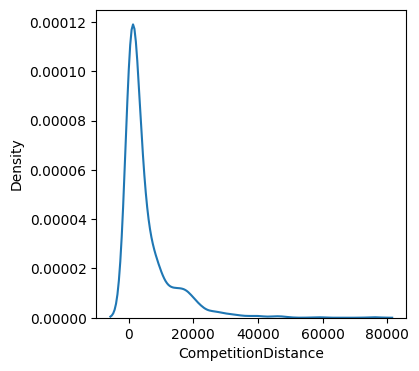

In [27]:
#plot density curve for competition distance
plt.figure(figsize=(4,4))
sns.kdeplot(store_copy.CompetitionDistance)
plt.show()

The data in 'CompetitionDistance' column is right skewed. For right-skewed data, common imputation methods include replacing the null values with the median or mode of the corresponding variable. Here, we will replace with median value.

In [28]:
#replacing null values with median
store_copy.CompetitionDistance.fillna(store_copy.CompetitionDistance.median(), inplace=True)

In [29]:
# Check data frame which have null values in Promo2SinceWeek, Promo2SinceYear and PromoInterval
store_copy[store_copy.Promo2SinceWeek.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN
5,6,a,a,310.00,12.00,2013.00,0,NaN,NaN,NaN
6,7,a,c,24000.00,4.00,2013.00,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.00,4.00,2004.00,0,NaN,NaN,NaN
1109,1110,c,c,900.00,9.00,2010.00,0,NaN,NaN,NaN
1111,1112,c,c,1880.00,4.00,2006.00,0,NaN,NaN,NaN
1112,1113,a,c,9260.00,NaN,NaN,0,NaN,NaN,NaN


Looks like Promo2 column is same i.e, 0 for all Null values in Promo2SinceWeek, Promo2SinceYear and PromoInterval

In [30]:
# Check Promo2 value for the null dataset
store_copy[store_copy.Promo2SinceWeek.isnull()].Promo2.unique()

array([0])

It has only value 0, that means there is no promotion or offer. Filling these null columns with 0 as there is no promotion going on.

In [31]:
#fill null values with 0
store_copy.Promo2SinceWeek.fillna(0, inplace=True)
store_copy.Promo2SinceYear.fillna(0, inplace=True)
store_copy.PromoInterval.fillna(0, inplace=True)

In [32]:
#checking dataset for null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear
store_copy[store_copy.CompetitionOpenSinceMonth.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.00,NaN,NaN,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
12,13,d,a,310.00,NaN,NaN,1,45.00,2009.00,"Feb,May,Aug,Nov"
15,16,a,c,3270.00,NaN,NaN,0,0.00,0.00,0
18,19,a,c,3240.00,NaN,NaN,1,22.00,2011.00,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.00,NaN,NaN,1,22.00,2012.00,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.00,NaN,NaN,1,10.00,2014.00,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.00,NaN,NaN,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.00,NaN,NaN,0,0.00,0.00,0
1113,1114,a,c,870.00,NaN,NaN,0,0.00,0.00,0


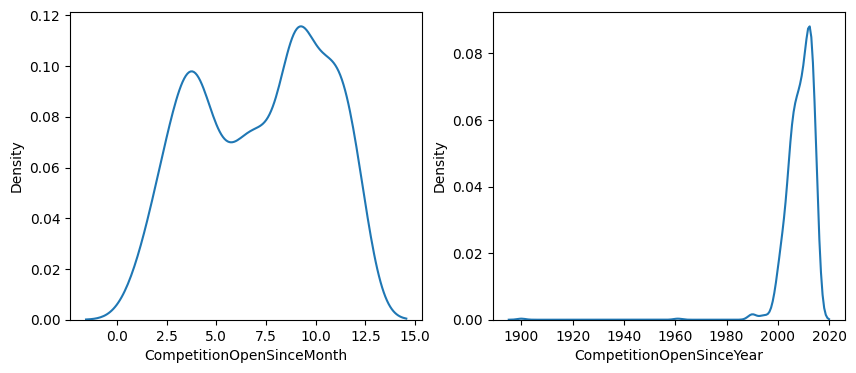

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot density curve for 'CompetitionOpenSinceMonth'
sns.kdeplot(store_copy.CompetitionOpenSinceMonth, ax=axes[0])

# Plot density curve for 'CompetitionOpenSinceYear'
sns.kdeplot(store_copy.CompetitionOpenSinceYear, ax=axes[1])
plt.show()

CompetitionOpenSinceMonth and CompetitionOpenSinceYear are sort of categorical variables. Also CompetitionDistance column shows there are some competitors at certain distance. Therefore, we will replace null values with mode.

In [34]:
#replacing null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear column with there respective mode
store_copy.CompetitionOpenSinceMonth.fillna(store_copy.CompetitionOpenSinceMonth.mode().iloc[0], inplace=True)
store_copy.CompetitionOpenSinceYear.fillna(store_copy.CompetitionOpenSinceYear.mode().iloc[0], inplace=True)

In [35]:
#check null values in store dataframe
store_copy.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**Change DataType**

Sales Dataset

In [36]:
#checking datatype of each variables
sales_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [37]:
#converting data type of Date column from object to datetime
sales_copy['Date'] = sales_copy.Date.astype('datetime64[ns]')

#check data type of Date column
sales_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


Store Dataset

In [38]:
#checking datatype of each variables
store_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [39]:
#change float datatype to int
store_copy['CompetitionDistance'] = store_copy.CompetitionDistance.astype('int')
store_copy['CompetitionOpenSinceMonth'] = store_copy.CompetitionOpenSinceMonth.astype('int')
store_copy['CompetitionOpenSinceYear'] = store_copy.CompetitionOpenSinceYear.astype('int')
store_copy['Promo2SinceWeek'] = store_copy.Promo2SinceWeek.astype('int')
store_copy['Promo2SinceYear'] = store_copy.Promo2SinceYear.astype('int')

In [40]:
#after converting check datatype
store_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Store                      1115 non-null   int64 
 1   StoreType                  1115 non-null   object
 2   Assortment                 1115 non-null   object
 3   CompetitionDistance        1115 non-null   int64 
 4   CompetitionOpenSinceMonth  1115 non-null   int64 
 5   CompetitionOpenSinceYear   1115 non-null   int64 
 6   Promo2                     1115 non-null   int64 
 7   Promo2SinceWeek            1115 non-null   int64 
 8   Promo2SinceYear            1115 non-null   int64 
 9   PromoInterval              1115 non-null   object
dtypes: int64(7), object(3)
memory usage: 87.2+ KB


**Merging Both Datasets (Sales and Store datasets)**

Both dataset have Store column as common which contains Store ID. Merge both tables on Store

In [41]:
#merge both datasets
df = sales_copy.merge(store_copy,
                      how = 'left',
                      on = 'Store')

#check shape of new merged df
df.shape

(1017209, 18)

In [42]:
#print first 3 rows of merged dataset
df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"


In [43]:
#check info of merged df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [44]:
#check description of merged df
df.describe().apply(lambda x: round(x,2))

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18,5422.02,7.79,2010.06,0.50,11.65,1007.01
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38,7706.92,2.78,5.34,0.50,15.32,1005.88
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,20.00,1.00,1900.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,710.00,6.00,2008.00,0.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,2325.00,9.00,2012.00,1.00,1.00,2009.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,6880.00,9.00,2013.00,1.00,22.00,2012.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


In [45]:
#check null values
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### What all manipulations have you done and insights you found?

**Handling Null/ Missing values**


*   No Null values in Sales Dataset. So, we analyzed store dataset for Null values.
*   There were total 6 columns in store dataset where null values were perent, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval.
*   The data in 'CompetitionDistance' column is right skewed so, it was replaced with median value.
*   CompetitionOpenSinceMonth and CompetitionOpenSinceYear are sort of categorical variables so, replaced with mode.
*   Promo2 column is same i.e, 0 for all Null values in Promo2SinceWeek, Promo2SinceYear and PromoInterval. It has only value 0, that means there is no promotion or offer. Filled these null columns with 0 as there was no promotion going on.

**Change DataType**


*   Date was changed to datetime
*   Float was changed to int

**Merged Datasets**


*   Both datasets were merged on common column "Store" which contain Store ID.
*   Checked general info and description of merged dataset

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Sales Distribution

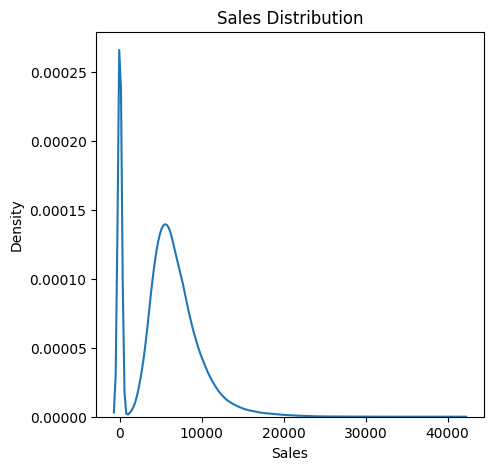

In [46]:
#plot sales density curve
#fig size
plt.figure(figsize=(5,5))
#density plot
sns.kdeplot(df.Sales)
#title of curve
plt.title('Sales Distribution')
#display curve
plt.show()

##### 1. Why did you pick the specific chart?

 Kde represents the probability distribution of the data values as the area under the plotted curve. It is used to visualize the distribution of the data and identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

There is pick at 0 which shows most of the sales are of 0. It may be the result of closed store.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

0 sales represents that some stores are closed.

#### Chart - 2 : Average Sales as the competition increased

In [47]:
#average sales since for year when competition started
df.groupby('CompetitionOpenSinceYear').Sales.mean()

CompetitionOpenSinceYear
1900   6889.46
1961   6460.93
1990   5915.55
1994   5987.54
1995   6160.06
1998   6091.21
1999   5698.10
2000   6515.34
2001   5323.59
2002   5473.46
2003   5788.87
2004   5224.70
2005   5659.65
2006   5787.62
2007   5449.72
2008   5597.50
2009   5933.89
2010   5631.38
2011   5665.62
2012   5715.77
2013   5895.77
2014   5975.86
2015   5518.30
Name: Sales, dtype: float64

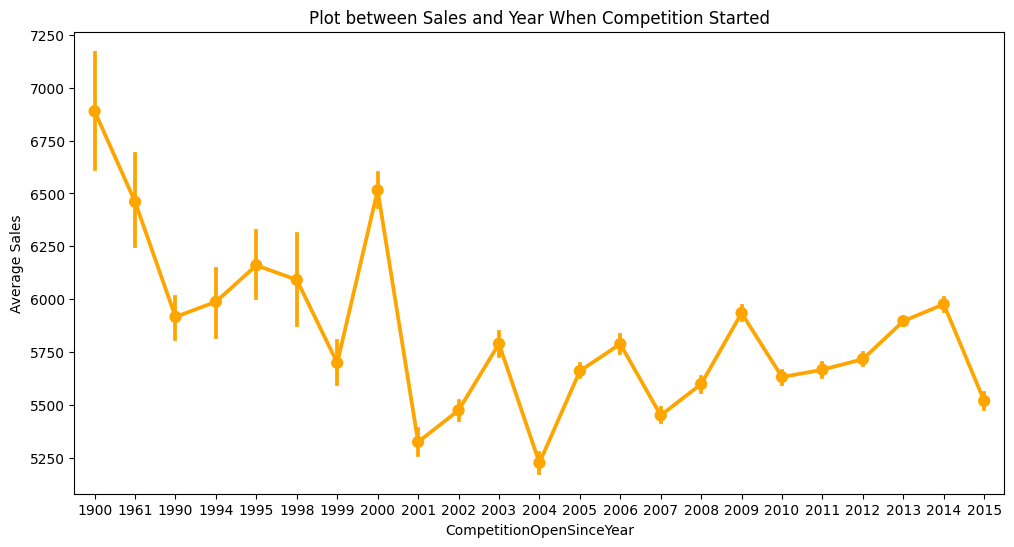

In [48]:
#plot average sales for each competition year
plt.figure(figsize=(12,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df, color='orange')
plt.title('Plot between Sales and Year When Competition Started')
plt.ylabel('Average Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Point plots can be more useful for focusing comparisons between different levels of one or more categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Average sale was highest in the year 1900 as, there were very less competition but as the competition started average sales started to decrease. It was lowest in 2004 and 2001 then incresed and again decreased in 2015.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the competition increased average sales decreased. To overcome the challange of other competitor store, it must increase the inventory variety or find other ways to incease sales.

#### Chart - 3 : Effect of promo year on average sale

In [49]:
df.groupby('Promo2SinceYear').Sales.mean()

Promo2SinceYear
0      6124.71
2009   5761.24
2010   5446.16
2011   5484.21
2012   5298.76
2013   4900.74
2014   5916.28
2015   5124.89
Name: Sales, dtype: float64

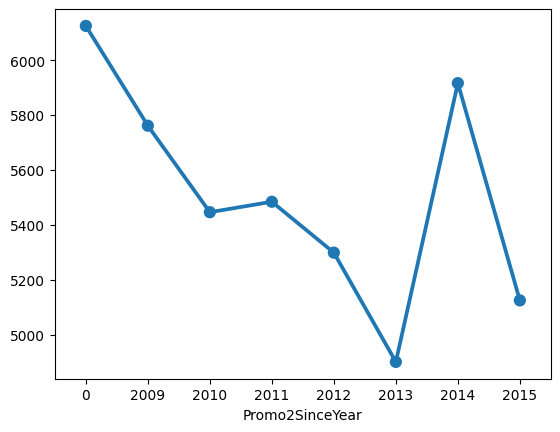

In [50]:
#plot point plot for average sales when promotion applied
sns.pointplot(x=df.groupby('Promo2SinceYear').Sales.mean().index, y=df.groupby('Promo2SinceYear').Sales.mean().values)
plt.show()

##### 1. Why did you pick the specific chart?

Point plots can be more useful for focusing comparisons between different levels of one or more categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Average sale was high for the store which applied consecutive promotion.2012, 2013 and 2015 have low average sale.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Stores should give promotion to increase their sales.

#### Chart - 4 : Top 30 stores according to sales

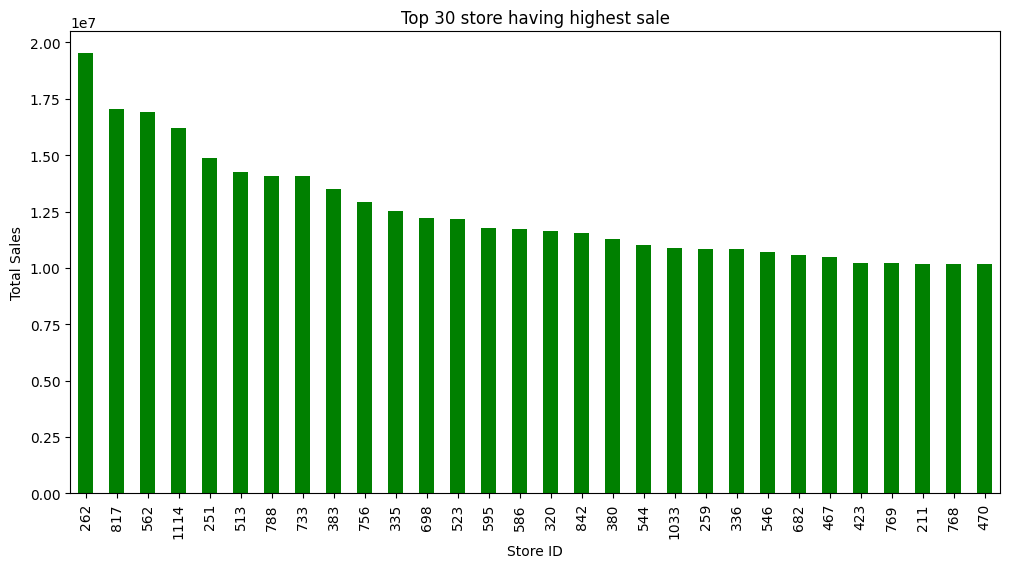

In [51]:
#top 30 store having highest sale
plt.figure(figsize=(12,6))
#plot top 30 stores
df.groupby('Store').Sales.sum().sort_values(ascending=False)[:30].plot(kind='bar', color='green')
#xlabel
plt.xlabel('Store ID')
#ylabel
plt.ylabel('Total Sales')
#title
plt.title('Top 30 store having highest sale')
#display plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is used for showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables. I used bar chart to show the total sales by top stores.

##### 2. What is/are the insight(s) found from the chart?

Store 262 has the highest sale.

#### Chart - 5 : Promo vs Sales

In [52]:
df.groupby('Promo').Sales.mean()

Promo
0   4406.05
1   7991.15
Name: Sales, dtype: float64

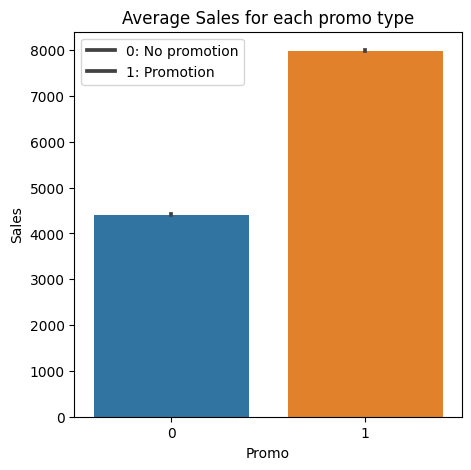

In [53]:
# Plot average sales for each promo type
plt.figure(figsize=(5,5))
sns.barplot(data=df , x='Promo', y='Sales')
#title
plt.title('Average Sales for each promo type')
plt.legend(['0: No promotion','1: Promotion'])
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is used for showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables. I used bar chart to show the average sales for each promo.

##### 2. What is/are the insight(s) found from the chart?

Average sale is high when there is promotion/ offer given by store.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Store should give promo regularly to attract customer so that average sale also increase.

#### Chart - 6 : Effect of customers on sale

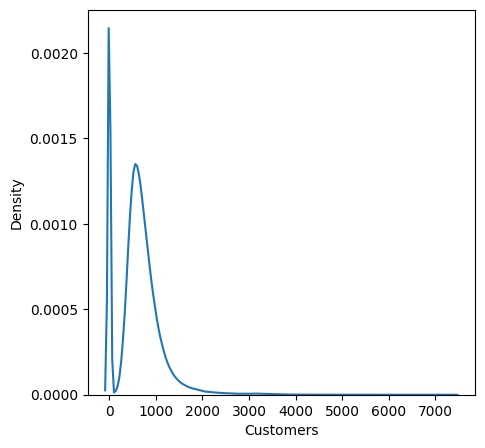

In [54]:
#density plot of customers
plt.figure(figsize=(5,5))
sns.kdeplot(df.Customers)
plt.show()

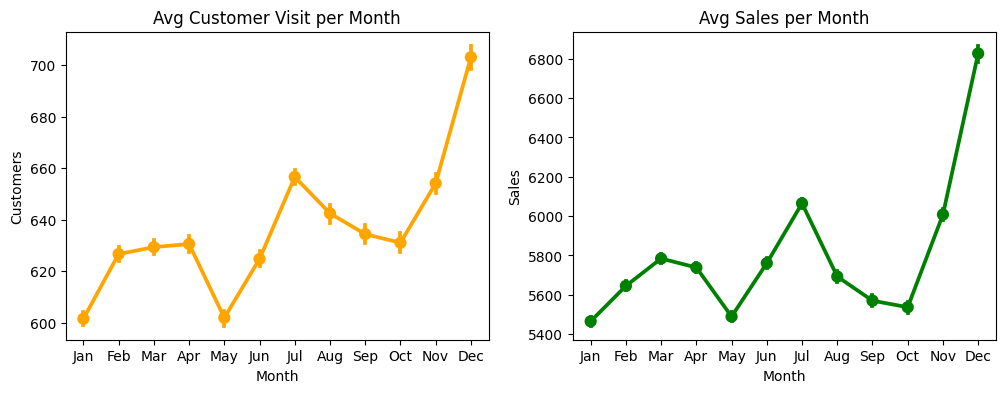

In [55]:
# Plot average customer visit and average sales per month
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# The desired order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#plot avg customer vist in different months
sns.pointplot(data=df , x=df.Date.dt.strftime('%b'), y='Customers', color='orange',ax=axes[0], order= month_order)
axes[0].set_xlabel('Month')
axes[0].set_title('Avg Customer Visit per Month')

#plot avg sales in different months
sns.pointplot(data=df , x=df.Date.dt.strftime('%b'), y='Sales', color='green', ax=axes[1], order = month_order)
axes[1].set_xlabel('Month')
axes[1].set_title('Avg Sales per Month')

plt.show()

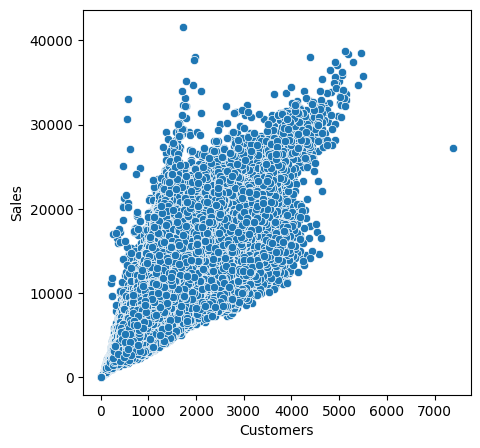

In [56]:
#scatter plot between sales and customer
plt.figure(figsize=(5,5))
sns.scatterplot(y=df['Sales'],x=df['Customers'])
plt.show()

##### 1. Why did you pick the specific chart?

Kde represents the probability distribution of the data values as the area under the plotted curve. It is used to visualize the distribution of the data and identify patterns and trends in the data.

Point plots can be more useful for focusing comparisons between different levels of one or more categorical variables.

Scatter plots used to observe and show relationships between two numeric variables.

##### 2. What is/are the insight(s) found from the chart?

Maximun customer visit is 0 as seen from kde plot, peak at 0.

December has most number of customer visit and highest sales, may be because of christmas.

May have less customer visit and lowest sales.

As the number of customer increases, sales also increses.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Number of customer visit directly affects the sales. So try to engage more customers.

#### Chart - 7 : Effect of Holiday on Sale

 a = public holiday, b = Easter holiday, c = Christmas, 0 = None

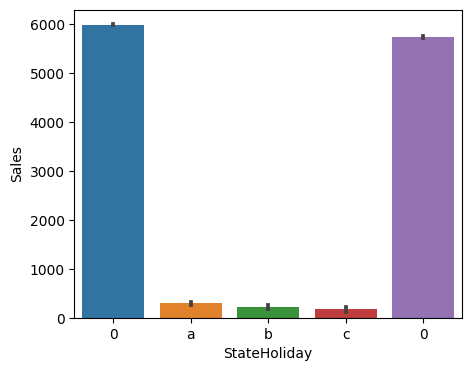

In [57]:
# state holiday vs sale
plt.figure(figsize=(5,4))
sns.barplot(x="StateHoliday", y="Sales", data=df)
plt.show()

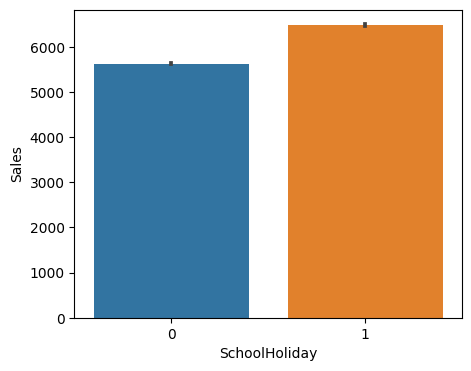

In [58]:
# School holiday vs sale
plt.figure(figsize=(5,4))
sns.barplot(x="SchoolHoliday", y="Sales", data=df)
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is used for showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

We can observe that most of the stores remain closed during State and Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

#### Chart - 8 : Sales and Store type

<Figure size 1200x1000 with 0 Axes>

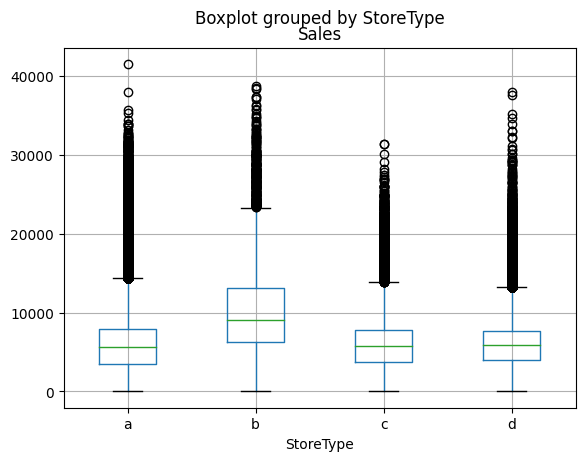

In [59]:
# Box plot for sales for different store type
plt.figure(figsize=(12, 10))
df.boxplot(column ='Sales' , by='StoreType')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot is used to represent the distribution of a dataset. It shows graphical representation of the five-number summary (minimum value, first quartile, median, third quartile, and maximum value) of a dataset and it helps to identify outliers and extreme values in a dataset. Boxplots are particularly useful when comparing distributions across different groups or categories.

##### 2. What is/are the insight(s) found from the chart?

Store type 'B' shows the most promissing sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Try to establish or make arrangments like B type stores.

#### Chart - 9 : Sales and Assortment

<Figure size 1200x1000 with 0 Axes>

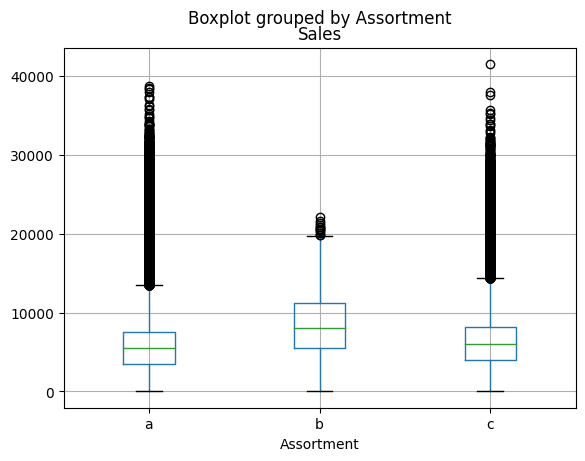

In [60]:
# Box plot for sales for different assortment type
plt.figure(figsize=(12, 10))
df.boxplot(column ='Sales' , by='Assortment')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot is used to represent the distribution of a dataset. It shows graphical representation of the five-number summary (minimum value, first quartile, median, third quartile, and maximum value) of a dataset and it helps to identify outliers and extreme values in a dataset. Boxplots are particularly useful when comparing distributions across different groups or categories.

##### 2. What is/are the insight(s) found from the chart?

Assortment type 'B' shows the most promissing sales.

#### Chart - 10 : Total Sales, Customer and Number of different type of Stores

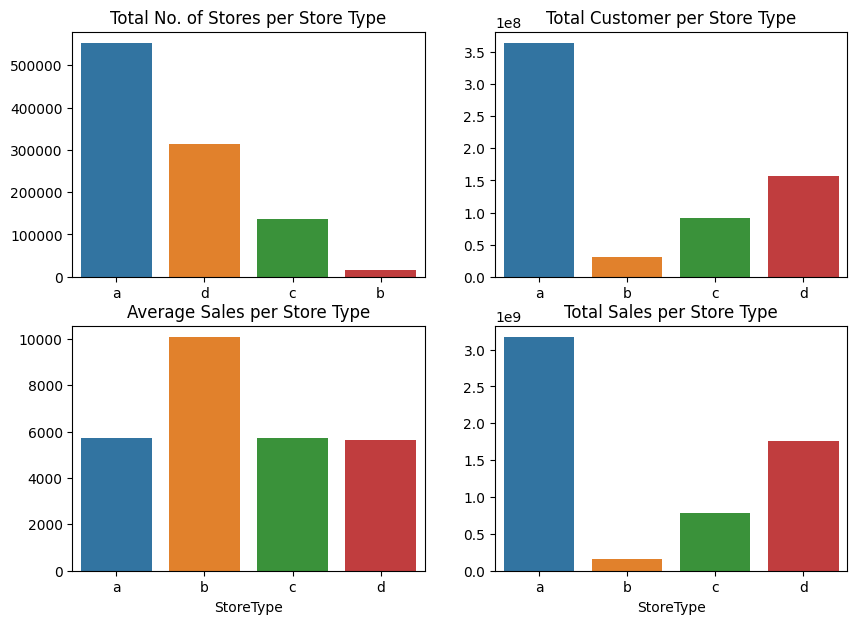

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Plot which type of store is more
sns.barplot(x = df.StoreType.value_counts().index,
            y = df.StoreType.value_counts().values,
            ax =ax[0][0])
ax[0][0].set_title('Total No. of Stores per Store Type')

#plot total no of customer for each store type
sns.barplot(x = df.groupby('StoreType').Customers.sum().index,
            y = df.groupby('StoreType').Customers.sum().values,
            ax =ax[0][1])
ax[0][1].set_xlabel('')
ax[0][1].set_title('Total Customer per Store Type')

#plot avg sale for each store type
sns.barplot(x = df.groupby('StoreType').Sales.mean().index,
            y = df.groupby('StoreType').Sales.mean().values,
            ax =ax[1][0])
ax[1][0].set_title('Average Sales per Store Type')

#plot total sale for each store type
sns.barplot(x = df.groupby('StoreType').Sales.sum().index,
            y = df.groupby('StoreType').Sales.sum().values,
            ax =ax[1][1])
ax[1][1].set_title('Total Sales per Store Type')

#display plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is used for showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?



*   Store type 'a' is more in number.
*   Store type 'a' has more customer visit.
*   Total sale of 'a' type store is highest.
*   Average sale of 'b' type is more.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Storetype 'a' has the highest number of branches,sales and customers from the 4 different storetypes. But  store type 'b' has the highest average sale. So, try to increase 'b' type store to increase revenue.

#### Chart - 11 : Different Assortments per Store Type

* a denotes basic things
* b denotes extra things
* c denotes extended things so the highest variety of products.

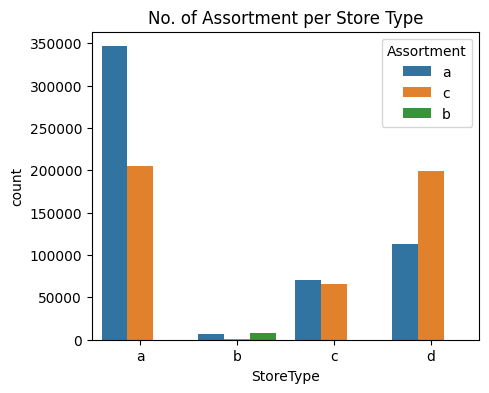

In [62]:
#plot different assortment for different store type
plt.figure(figsize=(5,4))
sns.countplot(data=df, x ='StoreType', hue='Assortment', order=['a','b','c','d'])
plt.title('No. of Assortment per Store Type')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is used for showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

*   Most of the stores have either a assortment type or c assortment type.
*   b type assortment is least only in b type store



#### Chart - 12 : Sales on different day of the week, with and without promo

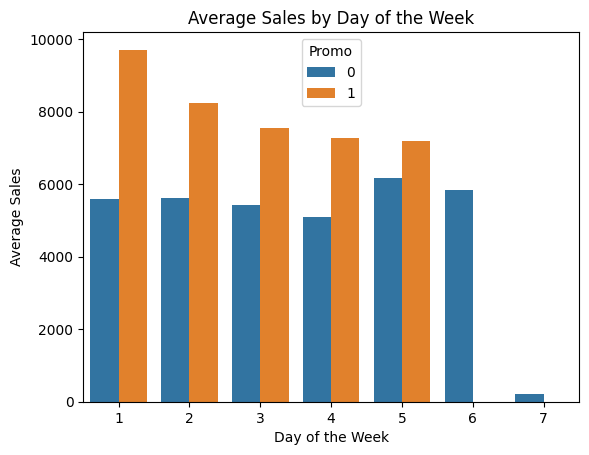

In [63]:
# Plot average sales on different days of the week with hue for promotion
sns.barplot(data=df, x='DayOfWeek', y='Sales', hue='Promo', errorbar=None)

# Set the plot title and labels
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is used for showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?



*   Day 7 has almost negligible sales, it means may be it is a holiday.
*   Average sale increase when promotion is applied.
*   Day 6 has no promotion applied.
*   First day of the week has heighest average sale


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Promotion attracts customers so, try to give promo. At the end of the week the sale is high even without promo.

#### Chart - 13 - Correlation Heatmap

<ipython-input-64-e52314fa425d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


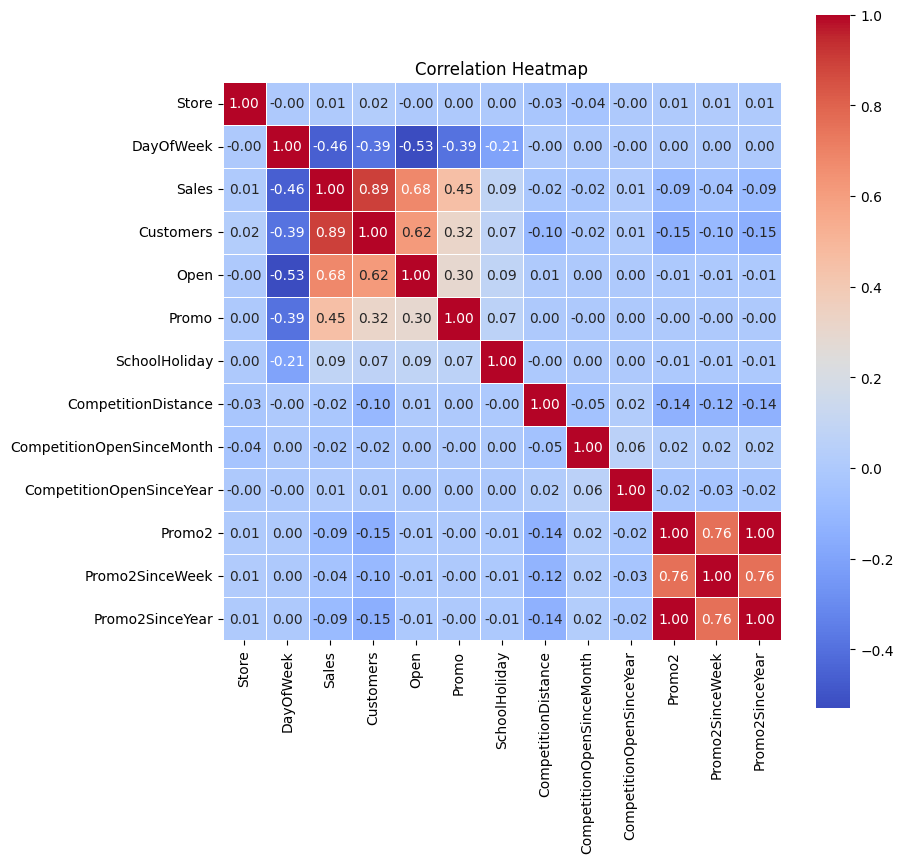

In [64]:
# Correlation Heatmap visualization code
plt.figure(figsize = (9,9))
sns.heatmap(df.corr(),
            annot = True,       #write the data value in each cell
            fmt=".2f",          #String formatting code when adding annotations
            linewidth=0.6,
            cmap="coolwarm",
            square = True)

plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are used to show the relationship between two variables, with each variable plotted on each axis. By observing how the color of the cells on each axis changes, we can see if there is a pattern/ relation in the values ​​of one or two variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

*   Sales and customers is highly correlated that means more customer more revenue.
*   Sales and promo is highly correlated that means more offers attracts more customers.
*   Promo2 and Promo2SinceYear is highly correlated which means year by year consecutive promotions are running in stores.



#### Chart - 14 - Pair Plot

<Figure size 1000x800 with 0 Axes>

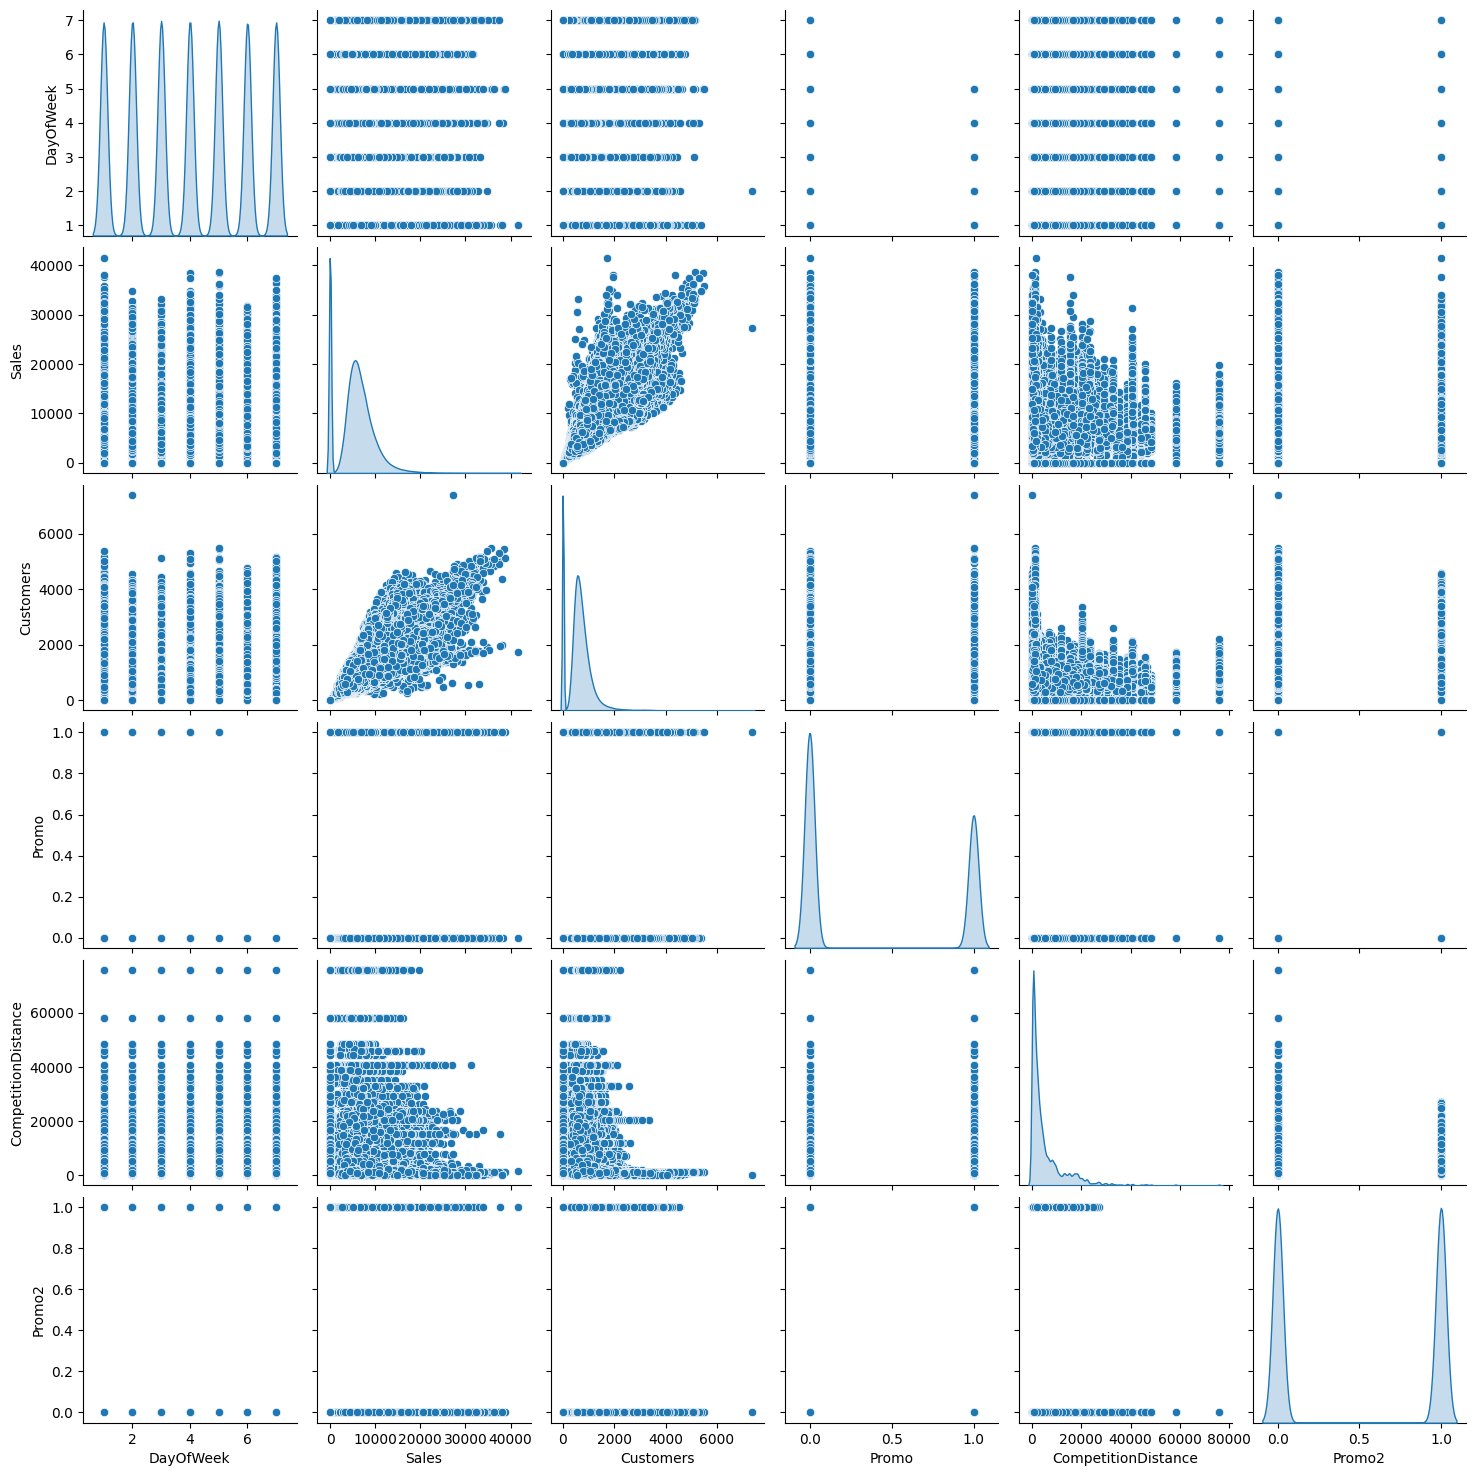

In [65]:
# Pair Plot visualization code
plt.figure(figsize=(10,8))
small_df = df[['DayOfWeek', 'Sales', 'Customers', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2']]
sns.pairplot(small_df, diag_kind='kde')
plt.show()

##### 1. Why did you pick the specific chart?

Pair plots show the relationships between variables. A pair plot is essentially a scatter plot matrix, which means that it consists of multiple scatter plots arranged in a grid. I used pair plot to analyze the patterns of data and relationship between the features. It is same as the correlation map but here we will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Cannot interpret much information. As seen earlier relation between Sales and Customers. Day of the week and sales, lowest at day 7. As competition distance increases promotion has been removed.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement - 1 : Promo and Sale are related to each other (Ref Chart - 5)

Hypothetical Statement - 2 : Customer and Sale are related to each other (Ref Chart - 6)

Hypothetical Statement - 2 : School Holiday and Sale are related to each other (Ref Chart - 7)

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Formulate Hypotheses:

Null Hypothesis (H₀): There is no significant difference in sales between the promoted and non-promoted groups i.e, Sales & Promo are independent of each other.

Alternative Hypothesis (Hₐ): There is a significant difference in sales between the promoted and non-promoted groups i.e, Sales & Promo are dependent on each other.

#### 2. Perform an appropriate statistical test.

In [66]:
# Perform Statistical Test to obtain P-Value
#import library for z-test
from statsmodels.stats import weightstats as stests

# sales where promotion was applied
promo_1_sales = df[df['Promo'] == 1]['Sales']

# sales where promotion was not applied
promo_0_sales = df[df['Promo'] == 0]['Sales']

# Calculate means and standard deviations
mean_promoted = promo_1_sales.mean()
mean_non_promoted = promo_0_sales.mean()
std_dev_promoted = promo_1_sales.std(ddof=1)
std_dev_non_promoted = promo_0_sales.std(ddof=1)

# Calculate the standard error of the difference in means
standard_error = np.sqrt((std_dev_promoted**2 / len(promo_1_sales)) + (std_dev_non_promoted**2 / len(promo_0_sales)))

# Perform the z-test
z_score, p_value1 = stests.ztest(promo_1_sales, promo_0_sales, value=0, alternative='two-sided')

print("Z-Score:", z_score)
print("P-Value:", p_value1)

Z-Score: 511.54718673163774
P-Value: 0.0


In [67]:
# weather reject or accept the hypothesis
if p_value1 > 0.05:
  print('Null Hypothesis Accepted')

else:
  print('Null Hypothesis Rejected & Alternative Hypothesis Accepted')

Null Hypothesis Rejected & Alternative Hypothesis Accepted


##### Which statistical test have you done to obtain P-Value?

I have used Z-test to obtain P-Value.

##### Why did you choose the specific statistical test?

A z-test is a statistical hypothesis test that is used to compare a sample mean to a known population mean when the population standard deviation is known. It's particularly useful when you have a large sample size.

Here we have compared the mean sale when promotion was applied and when not applied.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Formulate Hypotheses:

Null Hypothesis (H₀): There is no relation between Sales and Customers visited.

Alternative Hypothesis (Hₐ): There is relation between Sales and Customers visited.

#### 2. Perform an appropriate statistical test.

In [68]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

#customer df
customers = df['Customers']

#sales df
sales = df['Sales']

# Calculate Pearson correlation coefficient and p-value
corr_coefficient, p_value2 = pearsonr(customers, sales)

print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-Value:", p_value2)

Pearson Correlation Coefficient: 0.8947107733017134
P-Value: 0.0


In [69]:
# weather reject or accept the hypothesis
if p_value2 > 0.05:
  print('Null Hypothesis Accepted')

else:
  print('Null Hypothesis Rejected & Alternative Hypothesis Accepted')

Null Hypothesis Rejected & Alternative Hypothesis Accepted


##### Which statistical test have you done to obtain P-Value?

I have used Pearson correlation coefficient (r) test to obtain P-Value.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Customers and sales features we got Correlation coefficient as 0.939 which implies that theses two features are having strong positive correlation between them.

As the p-value is low we rejected the null hypothesis.
From Pearson Correlation Coefficient it can be seen that customer and sales are co-related as it's quite high '0.89'.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Formulate Hypotheses:

Null Hypothesis (H₀): There is no relation between Sale and School Holiday.

Alternative Hypothesis (Hₐ): There is relation between Sale and School Holiday.

#### 2. Perform an appropriate statistical test.

In [70]:
# Perform Statistical Test to obtain P-Value

# sales when there was holiday
holiday_1_sales_1_sales = df[df['SchoolHoliday'] == 1]['Sales']

# sales when there was no holiday
holiday_0_sales = df[df['SchoolHoliday'] == 0]['Sales']

# Perform the z-test
z_score, p_value3 = stests.ztest(promo_1_sales, promo_0_sales, value=0)

print("Z-Score:", z_score)
print("P-Value:", p_value3)

Z-Score: 511.54718673163774
P-Value: 0.0


In [71]:
# weather reject or accept the hypothesis
if p_value3 > 0.05:
  print('Null Hypothesis Accepted')

else:
  print('Null Hypothesis Rejected & Alternative Hypothesis Accepted')

Null Hypothesis Rejected & Alternative Hypothesis Accepted


##### Which statistical test have you done to obtain P-Value?

I have used Z-test to obtain P-Value.

##### Why did you choose the specific statistical test?

A z-test is a statistical hypothesis test that is used to compare a sample mean to a known population mean when the population standard deviation is known. It's particularly useful when you have a large sample size.

Here we have compared the mean sale when there was holiday and when there was not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [72]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing values in the data frame as the null values has already been removed.

*   No Null values in Sales Dataset. So, we analyzed store dataset for Null values.
*   There were total 6 columns in store dataset where null values were perent, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval.
*   The data in 'CompetitionDistance' column is right skewed so, it was replaced with median value.
*   CompetitionOpenSinceMonth and CompetitionOpenSinceYear are sort of categorical variables so, replaced with mode.
*   Promo2 column is same i.e, 0 for all Null values in Promo2SinceWeek, Promo2SinceYear and PromoInterval. It has only value 0, that means there is no promotion or offer. Filled these null columns with 0 as there was no promotion going on.


### 2. Handling Outliers

<Axes: xlabel='Sales', ylabel='Density'>

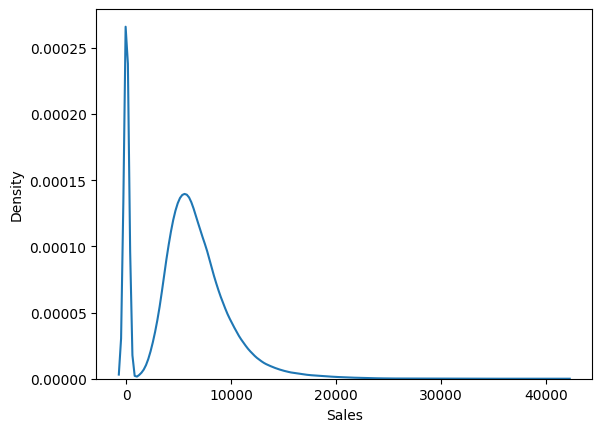

In [73]:
# density plot for sales
sns.kdeplot(df.Sales)

In [74]:
#check percentage of sales row where sale=0
percent = df[df.Sales==0].shape[0] / len(df) *100
print(f'Number of rows where sale=0 is {len(df[df.Sales==0])}')
print(f'percentage row where sale=0 is {percent:.2f}%')

Number of rows where sale=0 is 172871
percentage row where sale=0 is 16.99%


Sale = 0 doesn't make sense it may be the reason store was closed. So, we will work on only those data where sale is not o.

First we will seperate data set where sale is not 0.

In [75]:
#check weather the store was open or closed when sale=0
df[(df.Sales==0)].Open.value_counts()

0    172817
1        54
Name: Open, dtype: int64

In [76]:
# drop rows where sale=0 and store is closed
df1 =df.drop(df[(df.Sales==0) & (df.Open==0)].index)

In [77]:
df1.shape

(844392, 18)

<Axes: xlabel='Sales', ylabel='Density'>

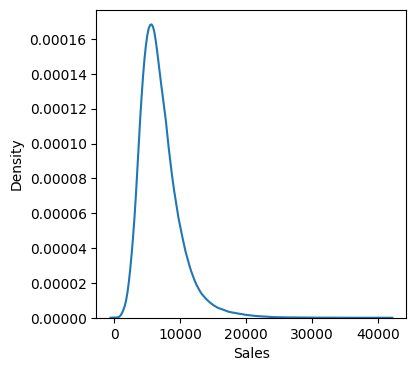

In [78]:
#density plot for sales
plt.figure(figsize = (4,4))
sns.kdeplot(df1.Sales)

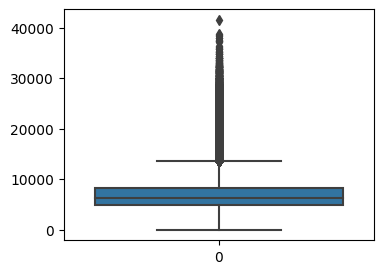

In [79]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(4,3))
sns.boxplot(df1['Sales'])
plt.show()

In [80]:
df.Sales.describe()

count   1017209.00
mean       5773.82
std        3849.93
min           0.00
25%        3727.00
50%        5744.00
75%        7856.00
max       41551.00
Name: Sales, dtype: float64

In [81]:
#define different percentie range for sales
Q1 = 3727
Q2 = 5744
Q3 = 7856
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [82]:
# Number of sales greater than upper limit
temp_high_sale = df[df.Sales > upper_limit]
temp_high_sale.shape

(26694, 18)

In [83]:
#check the reason for high sale
#can we remove or replace high sales
temp_high_sale.Promo.value_counts()

1    19187
0     7507
Name: Promo, dtype: int64

The high sale correosponds to promotion. So, we can't remove or alter the value as it may affect our results. So, we will leave sales column as it is.

In [84]:
df1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00
mean,558.42,3.52,6955.51,762.73,1.00,0.45,0.19,5449.87,7.79,2010.07,0.50,11.60,1003.23
std,321.73,1.72,3104.21,401.23,0.00,0.50,0.40,7800.95,2.78,5.33,0.50,15.31,1005.87
min,1.00,1.00,0.00,0.00,1.00,0.00,0.00,20.00,1.00,1900.00,0.00,0.00,0.00
25%,280.00,2.00,4859.00,519.00,1.00,0.00,0.00,710.00,6.00,2008.00,0.00,0.00,0.00
50%,558.00,3.00,6369.00,676.00,1.00,0.00,0.00,2325.00,9.00,2012.00,0.00,0.00,0.00
75%,837.00,5.00,8360.00,893.00,1.00,1.00,0.00,6880.00,9.00,2013.00,1.00,22.00,2012.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


We will analyze customers and Competition Distance

<Axes: >

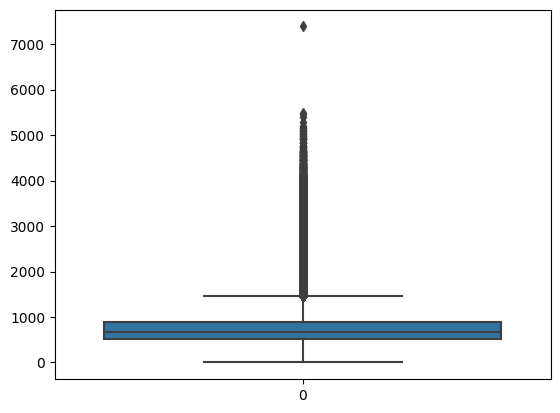

In [85]:
#box plot for customer column
sns.boxplot(df1.Customers)

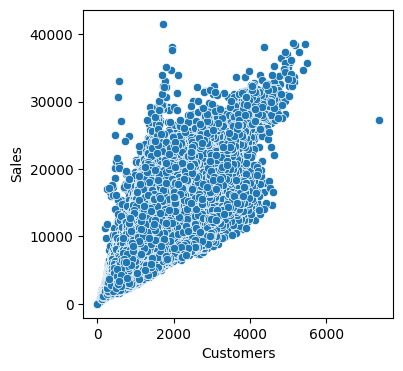

In [86]:
# scatter plot for sales and customer
plt.figure(figsize = (4,4))
sns.scatterplot(x=df1.Customers, y=df1.Sales)
plt.show()

As we have saw customer and sale is related so we will not change customer

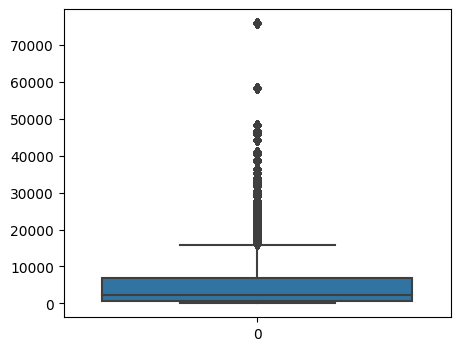

In [87]:
# box plot for Competition Distance
plt.figure(figsize = (5,4))
sns.boxplot(df1.CompetitionDistance)
plt.show()

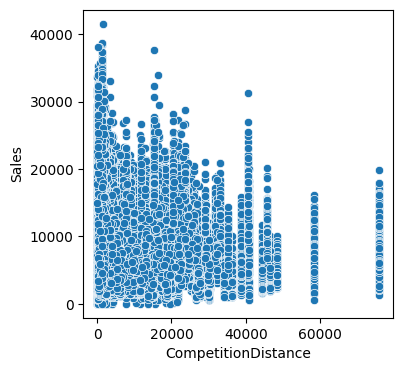

In [88]:
# scatter plot for sales and competition distance
plt.figure(figsize = (4,4))
sns.scatterplot(x=df1.CompetitionDistance, y=df1.Sales)
plt.show()

In [89]:
#define different quantile for Competition Distance
Q1 = df1.CompetitionDistance.quantile(0.25)
Q2 = df1.CompetitionDistance.quantile(0.50)
Q3 = df1.CompetitionDistance.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [90]:
#percentage of outliers greater than upper limt in Competition Distance
df1[df1.CompetitionDistance > upper_limit].shape[0] / len(df1.CompetitionDistance) * 100

9.834413400411183

In [91]:
#percentage of outliers lower than lower limt in Competition Distance
df1[df1.CompetitionDistance < lower_limit].shape[0] / len(df1.CompetitionDistance) * 100

0.0

In [92]:
# we will replace outlier greater than upper limit with upper limit
df1['CompetitionDistance'] = df1.CompetitionDistance.apply(lambda x: upper_limit if x > upper_limit else x)

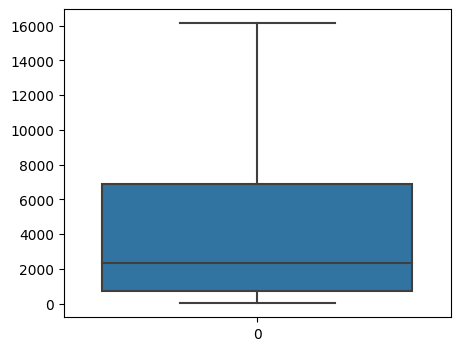

In [93]:
#box plot for Competition Distance
plt.figure(figsize = (5,4))
sns.boxplot(df1.CompetitionDistance)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers were checked by ploting box plot and calculating quantile values.

* The high sale correosponds to promotion. So, we can't remove or alter the value as it may affect our results. So, we didn't change sales column.

* As customer and sale was related so we didn't change customer.

* For Competition Distance, we replaced outlier greater than upper limit with upper limit.

### 3. Categorical Encoding

In [94]:
# Encode your categorical columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        844392 non-null  float64

In [95]:
#check for unique values in state holiday
df1['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

Here 0 denotes No Holiday

'a' , 'b' 'c' denotes Holiday, will replace these by 1

In [96]:
# 0 if there was no holiday and 1 if there was any type of holiday
df1['StateHoliday'] = df1.StateHoliday.apply(lambda x: 0 if x in [0,'0'] else 1)

In [97]:
#check number of values
df1.StateHoliday.value_counts()

0    843482
1       910
Name: StateHoliday, dtype: int64

In [98]:
#using one-hot-encoding to encode the categorical variable
final_df = pd.get_dummies(df1, dtype= int, drop_first=True)

The drop_first parameter in the pd.get_dummies function in pandas is used to prevent multicollinearity in your dataset when creating dummy variables from categorical data

In [99]:
#final dataset first rows
final_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,1270.00,9,2008,0,0,0,0,1,0,0,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,570.00,11,2007,1,13,2010,0,0,0,0,0,0,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

* State Holiday was seperated in two categories 0 for No Holiday and 1 for Holiday.

* Nominal Encoding (One-Hot-Encoding) was used to encode the categorical features because here the order of categories doesn't matter.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [100]:
# Manipulate Features to minimize feature correlation and create new features

#calculate competition open duration in month
final_df['CompetitionDuration'] = (final_df.Date.dt.year - final_df.CompetitionOpenSinceYear)*12 + (final_df.Date.dt.month - final_df.CompetitionOpenSinceMonth)

#putting 0 where competition duration is less than zero
final_df['CompetitionDuration'] = final_df.CompetitionDuration.apply(lambda x: 0 if x < 0 else x)

In [101]:
#add week of year
final_df['WeekOfYear'] = final_df.Date.dt.week

<ipython-input-101-23a6782f4468>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  final_df['WeekOfYear'] = final_df.Date.dt.week


In [102]:
#first 2 rows
final_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",CompetitionDuration,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,1270.00,9,2008,0,0,0,0,1,0,0,0,0,0,0,82,31
1,2,5,2015-07-31,6064,625,1,1,0,1,570.00,11,2007,1,13,2010,0,0,0,0,0,0,1,0,92,31


#### 2. Feature Selection

In [103]:
# Select your features wisely to avoid overfitting
#drop unnessesary features
#drop Store, date, Open, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, promo2SinceYear

final_df.drop(columns=['Store','Date','Open','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear'], inplace=True)

In [104]:
final_df.head()

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",CompetitionDuration,WeekOfYear
0,5,5263,555,1,0,1,1270.00,0,0,1,0,0,0,0,0,0,82,31
1,5,6064,625,1,0,1,570.00,1,0,0,0,0,0,0,1,0,92,31
2,5,8314,821,1,0,1,14130.00,1,0,0,0,0,0,0,1,0,103,31
3,5,13995,1498,1,0,1,620.00,0,0,1,0,0,1,0,0,0,70,31
4,5,4822,559,1,0,1,16135.00,0,0,0,0,0,0,0,0,0,3,31


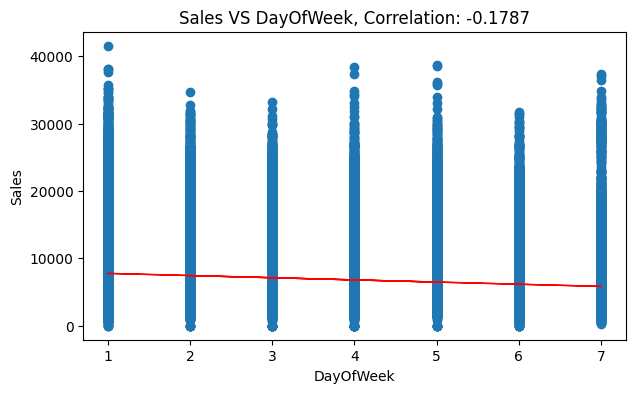

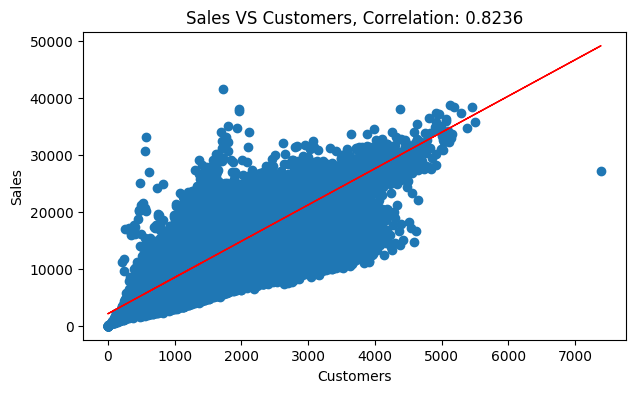

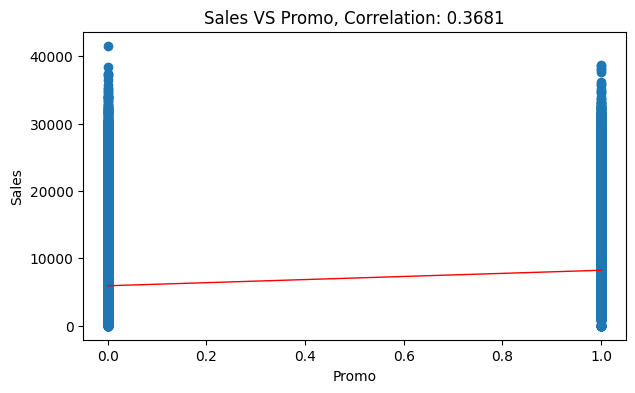

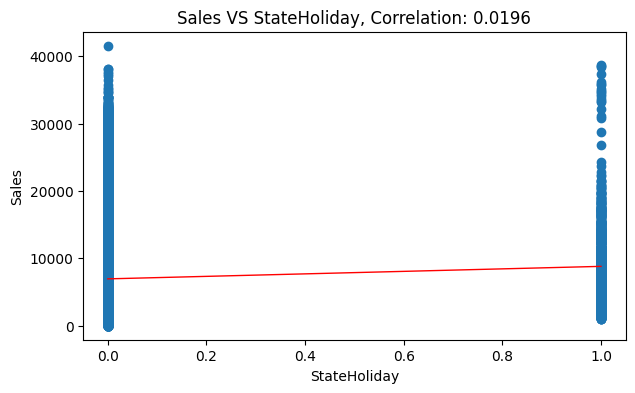

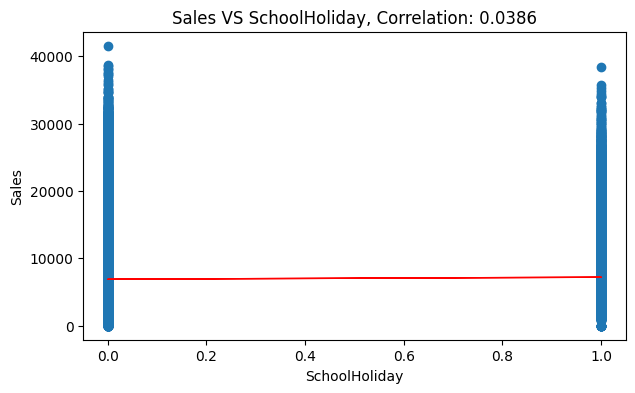

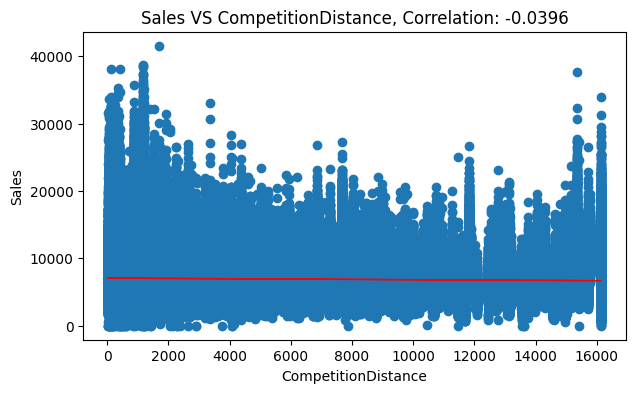

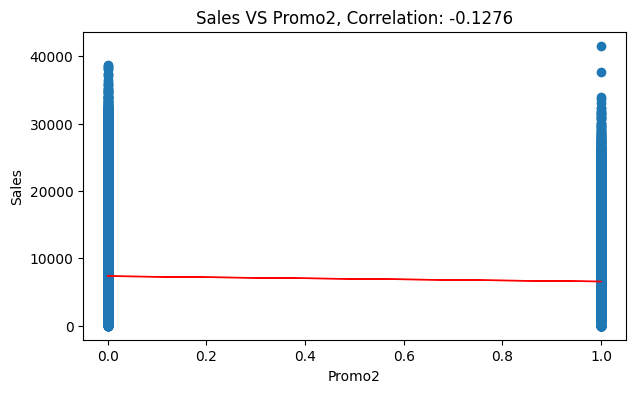

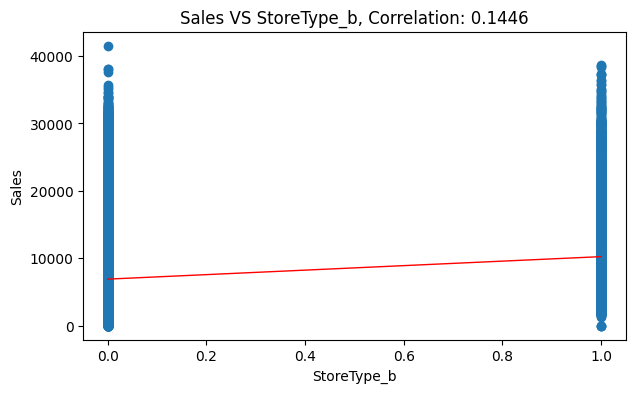

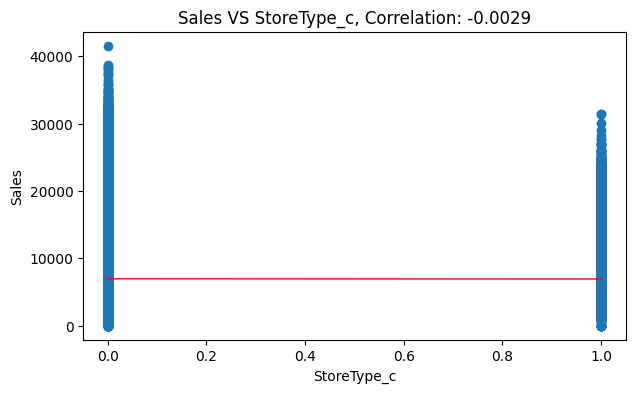

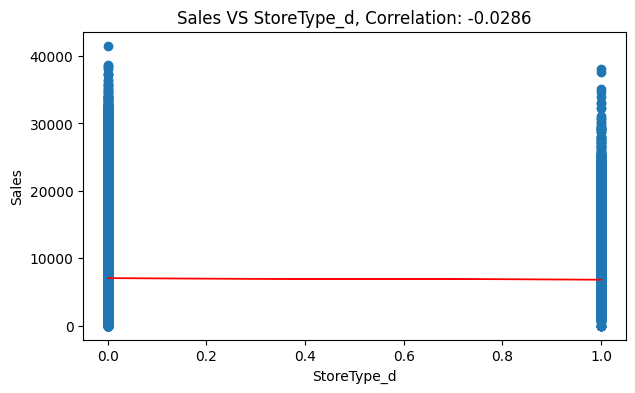

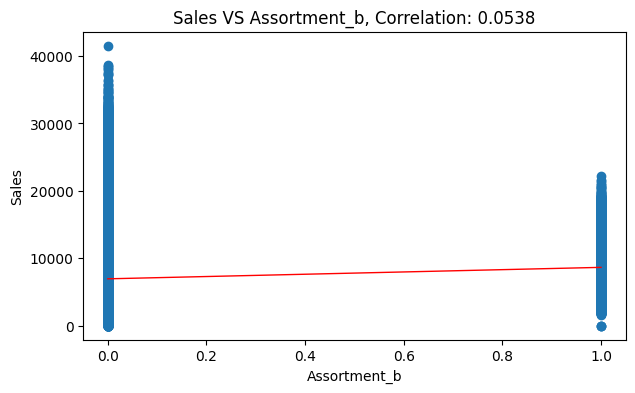

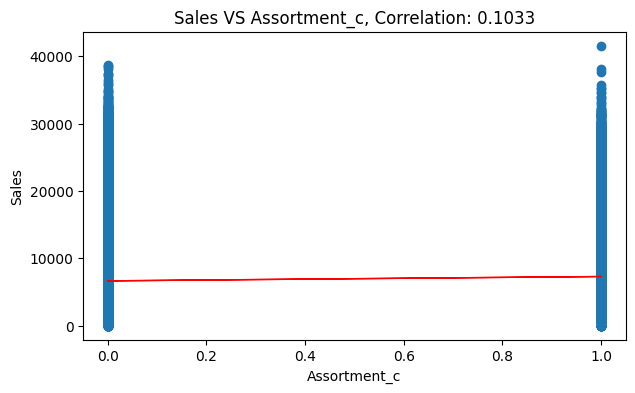

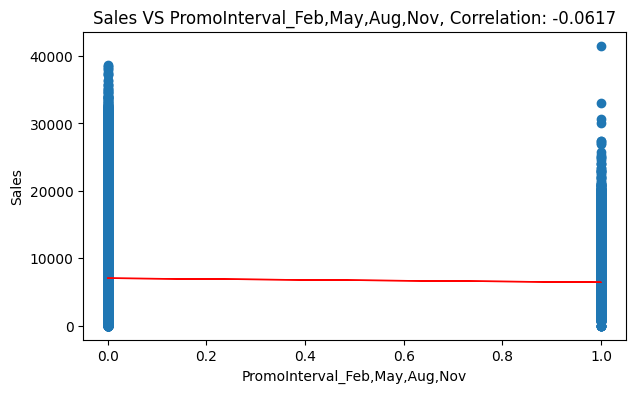

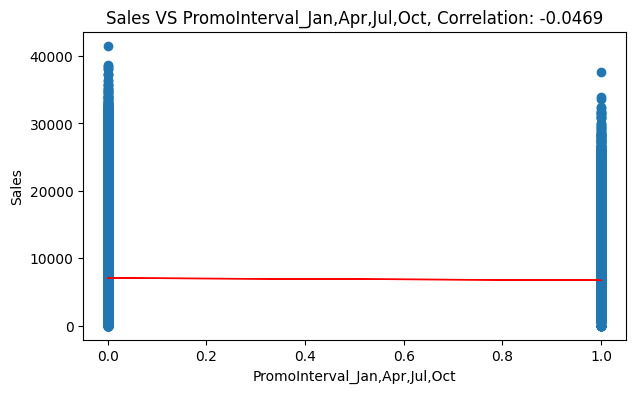

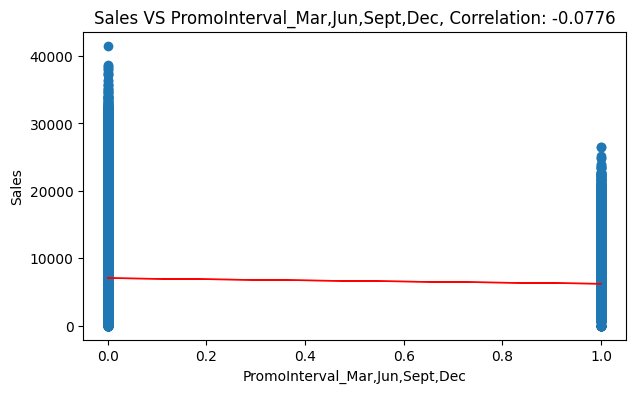

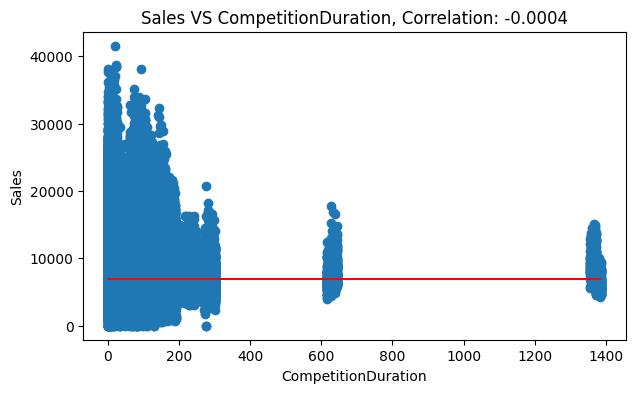

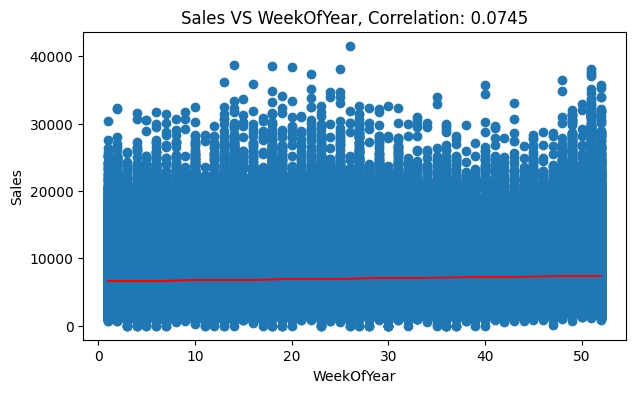

In [105]:
#understand the relation of Sale with other features using scatterplot and linear regression line
for feature in list(final_df.columns):
  if feature != 'Sales':
    #check variables correlation
    corr = final_df[feature].corr(final_df.Sales)

    #define figure size
    plt.figure(figsize=(7,4))
    ax = fig.gca()

    # Create a scatter plot of the data points
    plt.scatter(final_df[feature],final_df['Sales'])
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.title(f'Sales VS {feature}, Correlation: {round(corr,4)}', fontsize =12)

    # Fit a linear regression model to the data
    coefficients = np.polyfit(final_df[feature], final_df.Sales, 1)
    linear_function = np.poly1d(coefficients)

    # Calculate the corresponding y values for the line
    y_values = linear_function(final_df[feature])

    # Plot the linear regression line
    plt.plot(final_df[feature], y_values,color= 'red',lw=1)
    plt.show()

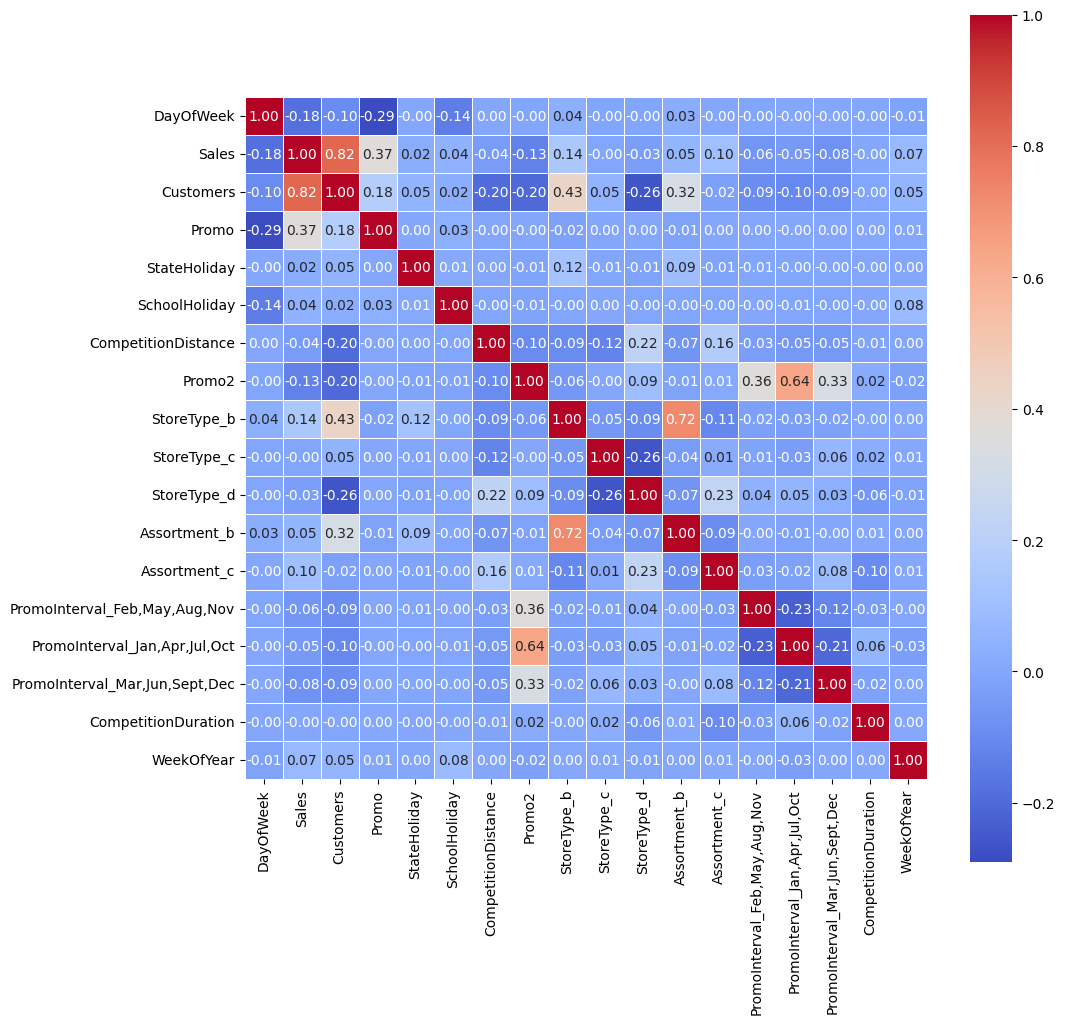

In [106]:
# Correlation Heatmap visualization code
plt.figure(figsize = (11,11))
sns.heatmap(final_df.corr(),
            annot = True,       #write the data value in each cell
            fmt=".2f",          #String formatting code when adding annotations
            linewidth=0.6,
            cmap="coolwarm",
            square = True)

plt.show()

* Promo2 and PromoInterval_Jan,Apr,Jul,Oct are highly co-related so, remove PromoInterval_Jan,Apr,Jul,Oct as it is less correlation wit Sale.

In [107]:
final_df.drop(['PromoInterval_Jan,Apr,Jul,Oct'], axis=1, inplace=True)

Check multicollinearity using VIF values

In [108]:
#import vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define independent variable
independent_feature = list(set(final_df.columns) - {'Sales'})
temp = final_df[independent_feature]

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = temp.columns
vif["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]

# Display the VIF values
vif

,Variable,VIF
0,CompetitionDistance,1.87
1,StateHoliday,1.02
2,StoreType_b,2.37
3,SchoolHoliday,1.25
4,"PromoInterval_Feb,May,Aug,Nov",1.41
5,Assortment_b,2.12
6,StoreType_c,1.25
7,WeekOfYear,3.35
8,Customers,4.74
9,StoreType_d,1.73


The VIF value is less 5 which shows very least multicollinearity.

##### What all feature selection methods have you used  and why?

Plotted the scatter plot and heatmap to see the relationship between dependent and independent feature and observed the following correlations:

Positive Corelation- Customers, Promo, SchoolHoliday, Assortment_b, Assortment_c, Month, Year, WeekOfYear.

Negative Corelation- DayOfWeek, StateHoliday, ComptitionDistance, Promo2, 'PromoInterval_Feb,May,Aug,Nov, 'PromoInterval_Jan,Apr,Jul,Oct, PromoInterval_Mar,Jun,Sept,Dec, CompetitionDuration.

No Corelation- StoreType_c, StoreType_d

Used Filter method with correlation heatmap and VIF(various inflation factor) and excluded the feature that showed high multicollinearity.

##### Which all features you found important and why?

Important Features :

'DayOfWeek', 'Sales', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c' 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Mar,Jun,Sept,Dec',
'CompetitionDuration', 'WeekOfYear'

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Distribution of Features Before Transformation



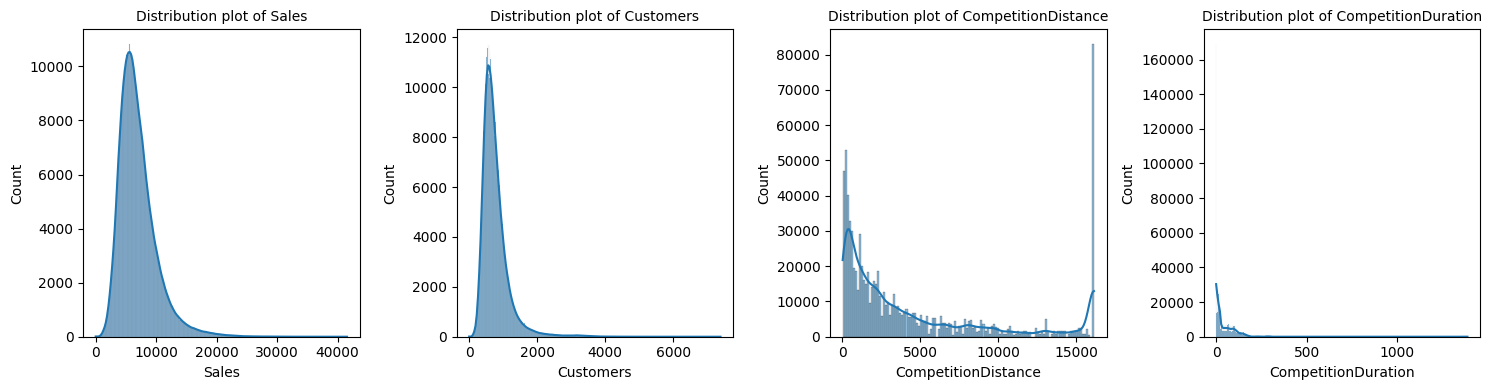

In [109]:
# Transform Your data
#check the distribution of continuous features
cont_features = ["Sales", "Customers", "CompetitionDistance", "CompetitionDuration"]

#distribution plot
print('Distribution of Features Before Transformation\n')
# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

# Loop through the features and create a displot for each
for i,feature in enumerate(cont_features):
  sns.histplot(final_df[feature],kde=True, ax=axs[i])
  axs[i].set_title(f'Distribution plot of {feature}', fontsize=10)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Using Square Root Transformation

In [110]:
#Using Square Root Transformation
final_df[cont_features] = np.sqrt(final_df[cont_features])

Distribution of Features After Transformation



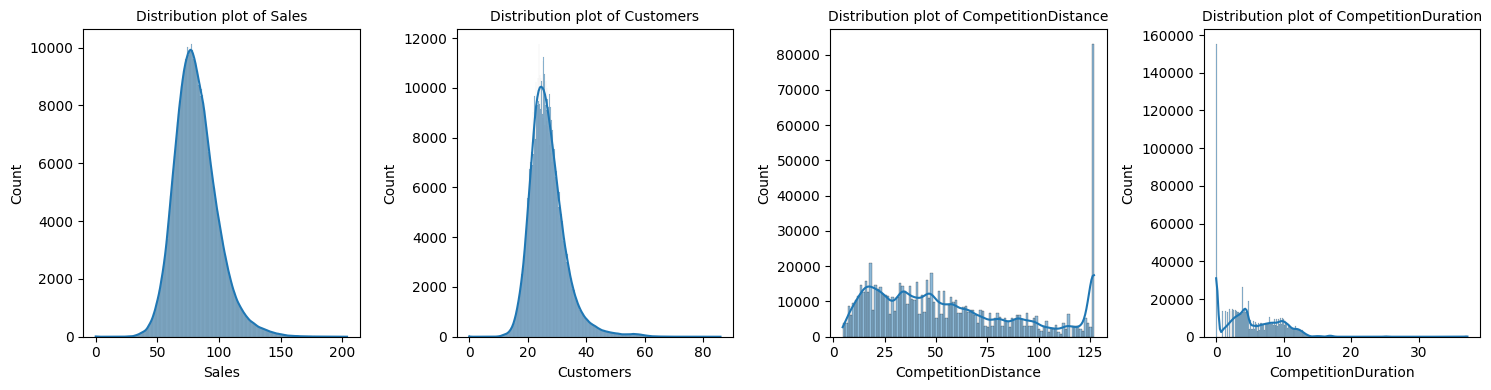

In [111]:
#distribution plot
print('Distribution of Features After Transformation\n')
# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

# Loop through the features and create a displot for each
for i,feature in enumerate(cont_features):
  sns.histplot(final_df[feature],kde=True, ax=axs[i])
  axs[i].set_title(f'Distribution plot of {feature}', fontsize=10)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Used square root transformation because data was right-skewed distribution and the variability increased with the mean.

### 6. Data Scaling

In [112]:
# Scaling your data
#seperate data for dependent and independent features

# Define dependent variable (y)
dependent_feature = 'Sales'
y = final_df[dependent_feature]

# Define independent variable (X)
columns = final_df.columns.to_list()
columns.remove('Sales')
independent_feature = columns
X = final_df[independent_feature]

In [113]:
#check shape
X.shape, y.shape

((844392, 16), (844392,))

In [114]:
#import StandardScaler library
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

##### **Which method have you used to scale you data and why?**

StandarScaler is used to ensure that all features are on a common scale. StandardScaler is commonly used in various machine learning tasks where the scale of the features can impact the performance of the model.

### 7. Dimesionality Reduction

Not needed

### 8. Data Splitting

In [115]:
# Split your data to train and test. Choose Splitting ratio wisely.
#import train test split
from sklearn.model_selection import train_test_split

#split data in ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =5)

In [116]:
# Check shape after spliting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((675513, 16), (168879, 16), (675513,), (168879,))

##### What data splitting ratio have you used and why?

* I have used 80:20 ratio to split the data. 80% for traing and 20% for testing.

* random_state = 9 was used so that we get same dataset in every spliting.

### 9. Handling Imbalanced Dataset

##### Not Needed

## ***7. ML Model Implementation***

### ML Model - 1
**Linear Regression**

In [117]:
#import Linear Regression library
from sklearn.linear_model import LinearRegression

# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(X_train,y_train)

# Predict on the model
y_train_regression_pred= regressor.predict(X_train)
y_test_regression_pred= regressor.predict(X_test)

In [118]:
#regression coefficient
regressor.coef_

array([-0.20445317, 16.94460162,  3.03697898,  0.02467252,  0.08522015,
        2.15824727,  1.47058614, -1.78992805, -0.26101721,  3.21737209,
       -2.02495392,  0.75182544, -0.1656187 , -0.38607426,  0.3166517 ,
        0.34753413])

Text(0.5, 1.0, ' Feature Importances')

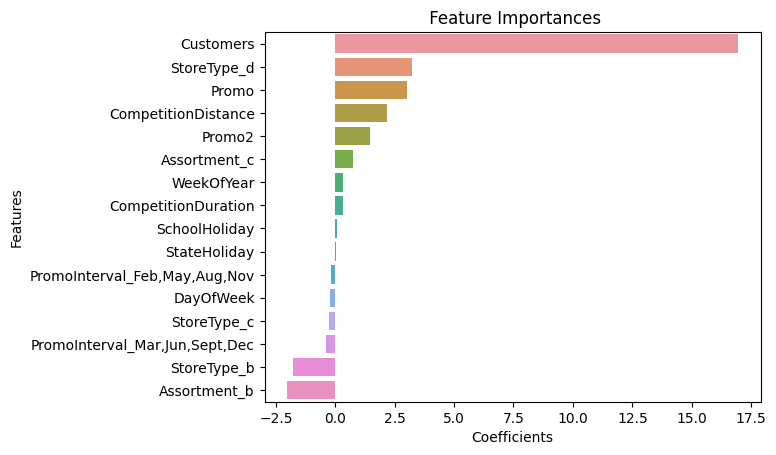

In [119]:
#visualising the importance of features
temp=pd.DataFrame()
temp["Features"]= independent_feature
temp["Coefficients"]=list(regressor.coef_)
temp.sort_values(by=["Coefficients"],ascending= False, inplace= True)
sns.barplot(x = temp["Coefficients"],y = temp["Features"])
plt.title(" Feature Importances")

* Customers, store D, Promo, Competition Distance, Promo2, Assortment C has positive impact on determining  Sales.

* Store B, Assortment B has negative impact.

In [120]:
#regression intercept
regressor.intercept_

81.55076918994222

Visualize the Actual y and Predicted y

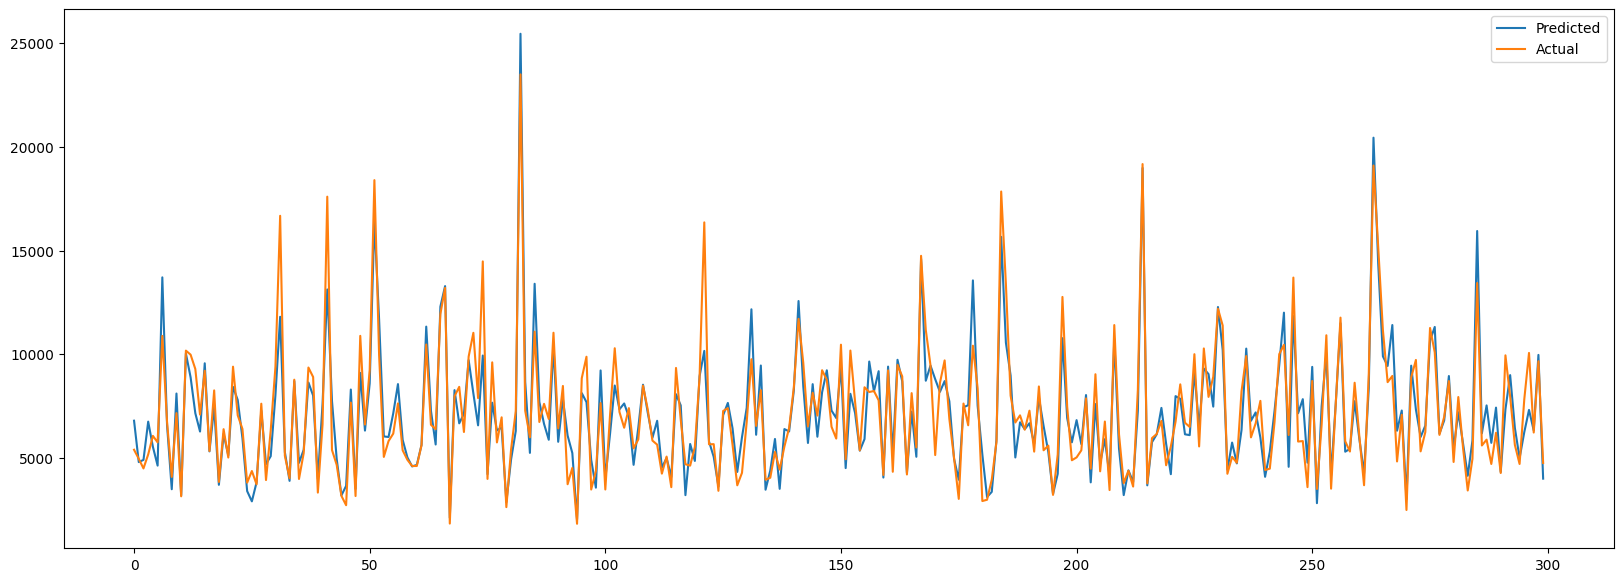

In [121]:
#plot predicted and actual sales for test data
#visualize the  first 300 actual and predicted value
plt.figure(figsize=(20,7))
plt.plot((y_test_regression_pred)[:300]**2)
plt.plot(y_test.values[:300]**2)
plt.legend(["Predicted","Actual"])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [122]:
# importing libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [123]:
#define a DataFrame and store accuracy score in this DataFrame
#store the accuracy metric in data frame
accuracy_df = pd.DataFrame(columns=['Model_Name','MAE_train','MAE_test','RMSE_train','RMSE_test','MAPE_train','MAPE_test','r2_train','r2_test','Accuracy_%_train','Accuracy_%_test'])


In [124]:
#define a function for evaluation metric

def evaluation_metric(model_name, y_train_initial, y_train_pred, y_test_initial, y_test_pred):
  '''Function to calculate the evaluation metric for regression model and store the score in DataFrame
  '''
  print(f'Accuracy Metric for {model_name}')
  print("-"*50)

  #converting y to its actual value by squaring
  y_train_initial, y_train_pred ,y_test_initial, y_test_pred = y_train_initial**2, y_train_pred**2, y_test_initial**2, y_test_pred**2

  # mean_absolute_error
  MAE_train= mean_absolute_error(y_train_initial,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test_initial,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  # mean_squared_error
  MSE_train= mean_squared_error(y_train_initial, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test_initial, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  # root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

  # mean_absolute_percentage_error
  MAPE_train = MAE_train/ np.mean(y_train_initial)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = MAE_test/ np.mean(y_test_initial)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train_initial,y_train_pred)
  print("R2 on train is:" ,R2_train)
  R2_test= r2_score(y_test_initial,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

  #store the accuracy metric in data frame
  # store score in list
  global accuracy_df
  scores=[model_name,MAE_train,MAE_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test,R2_train,R2_test,Accuracy_train,Accuracy_test]

  # create a new row with the values
  new_row = pd.DataFrame([scores], columns=accuracy_df.columns)

  # concat the new row to the DataFrame
  accuracy_df = pd.concat([accuracy_df,new_row], ignore_index=True)

  # Set the display format for floating-point numbers to 4 decimal places
  pd.options.display.float_format = '{:.4f}'.format

In [125]:
# Visualizing evaluation Metric Score chart
evaluation_metric('Linear Regression',y_train, y_train_regression_pred, y_test, y_test_regression_pred)

Accuracy Metric for Linear Regression
--------------------------------------------------
MAE on train is: 868.8736662843046
MAE on test is: 870.8778702225972
--------------------------------------------------
MSE on train is: 1433707.4614896174
MSE on test is: 1445494.3417609162
--------------------------------------------------
RMSE on train is: 1197.3752383816934
RMSE on test is: 1202.2871294998197
--------------------------------------------------
MAPE on train is: 12.497070444039545  %
MAPE on test is: 12.499868431531084  %
--------------------------------------------------
R2 on train is: 0.8511351325992389
R2 on test is: 0.8503131613551153
--------------------------------------------------
Accuracy of train is: 87.50292955596045  %
Accuracy of test is: 87.50013156846892  %
--------------------------------------------------


Visualizing Residue/Error

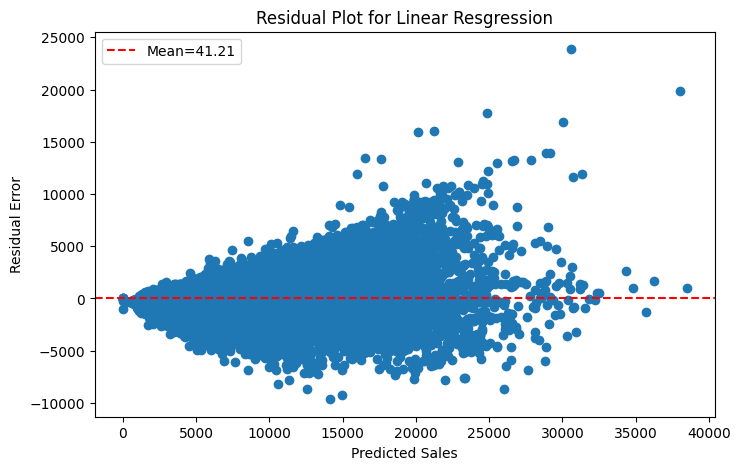

In [126]:
# creating a residual plot by first transfroming the square root back to original values
residuals = (y_test**2) - (y_test_regression_pred**2)
res_mean=residuals.mean().round(2)
plt.figure(figsize=(8,5))
plt.scatter((y_test**2), residuals)
plt.title("Residual Plot for Linear Resgression")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning
**Ridge Regression**

In [127]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Applying cross validation to check for improvements

#import ridge regressor
from sklearn.linear_model import Ridge

#import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create a Ridge Regression model
ridge = Ridge()

# Define a parameter grid for GridSearchCV
parameters = {"alpha": [0.01,0.1,1,3,5,10,12,14], "max_iter":[1,2,3]}

# Create a GridSearchCV object to search for the best parameter
grid_ridge = GridSearchCV(ridge,parameters, scoring='neg_mean_squared_error',cv=5)

# Fit the Algorithm
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 3, 5, 10, 12, 14],
                         'max_iter': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [128]:
# Predict on the model

# Get the best estimator (fitted model with the best parameters)
best_ridge_model = grid_ridge.best_estimator_

# Get the best parameters
best_ridge_parameters = grid_ridge.best_params_

# Get the mean squared error (MSE) of the best model on the validation data
best_ridge_mse = -grid_ridge.best_score_

# Make train predictions using the best model
y_train_grid_ridge_pred = best_ridge_model.predict(X_train)

# Make test predictions using the best model
y_test_grid_ridge_pred = best_ridge_model.predict(X_test)

# Evaluate the best model (e.g., using mean squared error)
ridge_mse = mean_squared_error(y_test, y_test_grid_ridge_pred)

print("Best parameters:", best_ridge_parameters)
print("Best MSE on validation data:", best_ridge_mse)
print("MSE on the entire dataset using the best model:", ridge_mse)

Best parameters: {'alpha': 1, 'max_iter': 1}
Best MSE on validation data: 43.2966863200774
MSE on the entire dataset using the best model: 43.51937222435487


In [129]:
#coefficients after hyperparamenter and crossvalidation
best_ridge_model.coef_

array([-0.20445737, 16.94456163,  3.03698231,  0.024672  ,  0.08522038,
        2.15823699,  1.47057586, -1.78991557, -0.26101751,  3.21736025,
       -2.02494988,  0.75182998, -0.16561782, -0.3860742 ,  0.31665039,
        0.34753543])

In [130]:
#intercept after hyperparamenter and crossvalidation
best_ridge_model.intercept_

81.55076917589722

In [131]:
# Visualizing evaluation Metric Score chart
evaluation_metric('Ridge Regression',y_train, y_train_grid_ridge_pred, y_test, y_test_grid_ridge_pred)

Accuracy Metric for Ridge Regression
--------------------------------------------------
MAE on train is: 868.8735734260971
MAE on test is: 870.8777651861204
--------------------------------------------------
MSE on train is: 1433707.320692781
MSE on test is: 1445494.0475020704
--------------------------------------------------
RMSE on train is: 1197.3751795877436
RMSE on test is: 1202.2870071251998
--------------------------------------------------
MAPE on train is: 12.49706910845348  %
MAPE on test is: 12.499866923923433  %
--------------------------------------------------
R2 on train is: 0.8511351472184712
R2 on test is: 0.8503131918268197
--------------------------------------------------
Accuracy of train is: 87.50293089154653  %
Accuracy of test is: 87.50013307607657  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite using Ridge Regression there isn't any significant changes in MAE, RMSE, MAPE, R2, Accuracy.

Now, we will use Elastic Net

### ML Model - 2
**Elastic Net Regression**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Elastic net is a variation of Linear Regression and is a regularization technique to reduce the overshadowing (if any exists) of a feature over other features. This model is a combination of Lasso and Ridge regression.

In [132]:
#import Elastic Net
from sklearn.linear_model import ElasticNet

# Create a Elastic Net Regression model
ela_net = ElasticNet()

# Define a parameter grid for GridSearchCV
parameters_elastic_net = {"alpha": [0.00001,0.0001,0.001,1,5,7], "max_iter":[30,50,100]}

# Create a GridSearchCV object to search for the best parameter
grid_elastic_net = GridSearchCV(ela_net,parameters_elastic_net, scoring='neg_mean_squared_error',cv=5)

# Fit the Algorithm
grid_elastic_net.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 1, 5, 7],
                         'max_iter': [30, 50, 100]},
             scoring='neg_mean_squared_error')

In [133]:
# Predict on the model

# Get the best estimator (fitted model with the best parameters)
best_elastic_net_model = grid_elastic_net.best_estimator_

# Get the best parameters
best_elastic_net_parameters = grid_elastic_net.best_params_

# Get the mean squared error (MSE) of the best model on the validation data
best_elastic_net_mse = -grid_elastic_net.best_score_

# Make train predictions using the best model
y_train_grid_elastic_net_pred = best_elastic_net_model.predict(X_train)

# Make test predictions using the best model
y_test_grid_elastic_net_pred = best_elastic_net_model.predict(X_test)

# Evaluate the best model (e.g., using mean squared error)
elastic_net_mse = mean_squared_error(y_test, y_test_grid_elastic_net_pred)

print("Best parameters:", best_elastic_net_parameters)
print("Best MSE on validation data:", best_elastic_net_mse)
print("MSE on the entire dataset using the best model:", elastic_net_mse)

Best parameters: {'alpha': 1e-05, 'max_iter': 30}
Best MSE on validation data: 43.296686310728276
MSE on the entire dataset using the best model: 43.5193662281694


In [134]:
# Calculating evaluation Metric Score chart
evaluation_metric('Elastic Net',y_train, y_train_grid_elastic_net_pred, y_test, y_test_grid_elastic_net_pred)

Accuracy Metric for Elastic Net
--------------------------------------------------
MAE on train is: 868.8733437852125
MAE on test is: 870.877485584443
--------------------------------------------------
MSE on train is: 1433707.2688580041
MSE on test is: 1445493.5228838904
--------------------------------------------------
RMSE on train is: 1197.375157942574
RMSE on test is: 1202.2867889500785
--------------------------------------------------
MAPE on train is: 12.497065805512648  %
MAPE on test is: 12.499862910749716  %
--------------------------------------------------
R2 on train is: 0.8511351526005853
R2 on test is: 0.8503132461531734
--------------------------------------------------
Accuracy of train is: 87.50293419448735  %
Accuracy of test is: 87.50013708925029  %
--------------------------------------------------


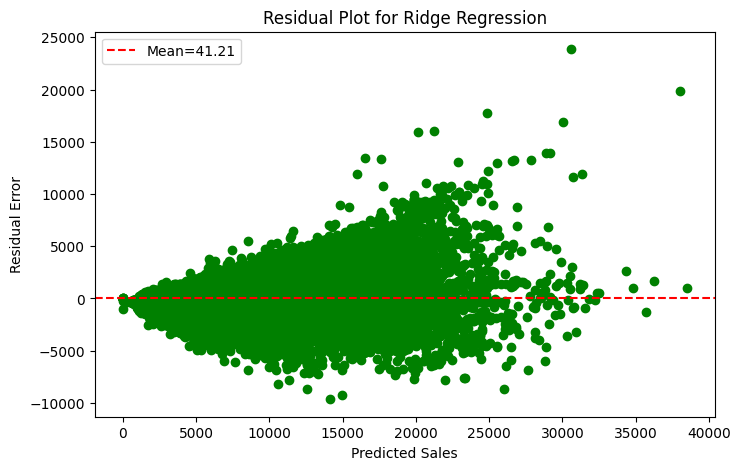

In [135]:
# creating a residual plot by first transfroming the square root back to original values
residuals = (y_test**2) - (y_test_grid_elastic_net_pred**2)
res_mean=residuals.mean().round(2)
plt.figure(figsize=(8,5))
plt.scatter((y_test**2), residuals,color="green")
plt.title("Residual Plot for Ridge Regression")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend()
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Here if we observe the Mean absolute Error, there is no improvement in it if we compare it from previous Linear Regression model.

Since, the Linear Regression and Elastic Net model have worked on the same lines, we have observed same trend in the residual error for both models.

Residual error is concentrated around zero near the mean of sales data

### ML Model - 3
**Decision Tree Regression**

In [136]:
# import the Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
dtree_reg = DecisionTreeRegressor(max_depth=16)

# fit the regressor with X and Y data
dtree_reg.fit(X_train, y_train)

# predict on model
y_train_dtree_pred= dtree_reg.predict(X_train)
y_test_dtree_pred= dtree_reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [137]:
# Calculating evaluation Metric Score chart
evaluation_metric('Decision Tree',y_train, y_train_dtree_pred, y_test, y_test_dtree_pred)

Accuracy Metric for Decision Tree
--------------------------------------------------
MAE on train is: 457.8153228251571
MAE on test is: 537.4870548677271
--------------------------------------------------
MSE on train is: 460344.54238551215
MSE on test is: 626956.4329211039
--------------------------------------------------
RMSE on train is: 678.4869507849891
RMSE on test is: 791.805805056457
--------------------------------------------------
MAPE on train is: 6.584789667033836  %
MAPE on test is: 7.714649435035545  %
--------------------------------------------------
R2 on train is: 0.9522014559443794
R2 on test is: 0.9350761025479296
--------------------------------------------------
Accuracy of train is: 93.41521033296617  %
Accuracy of test is: 92.28535056496446  %
--------------------------------------------------


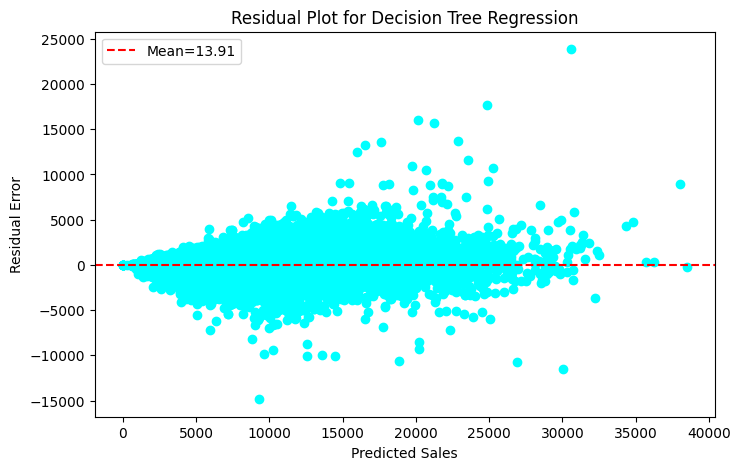

In [138]:
# creating a residual plot by first transfroming the square root back to original values
residuals = (y_test**2) - (y_test_dtree_pred**2)
res_mean=residuals.mean().round(2)
plt.figure(figsize=(8,5))
plt.scatter((y_test**2), residuals,c="cyan")
plt.title("Residual Plot for Decision Tree Regression")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [140]:
# Create a Decision Tree Regressor
dt_grid_regressor = DecisionTreeRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [20,25],
    'min_samples_split': [2,3],
    'min_samples_leaf': [4,6,8]
}

# Initialize GridSearchCV
grid_dt = GridSearchCV(dt_grid_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

# Fit the grid search to the training data
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [20, 25], 'min_samples_leaf': [4, 6],
                         'min_samples_split': [2, 3]},
             scoring='neg_mean_squared_error')

In [141]:
# Predict on the model

# Get the best estimator (fitted model with the best parameters)
best_dt_grid_model = grid_dt.best_estimator_

# Get the best parameters
best_dt_grid_parameters = grid_dt.best_params_

# Get the mean squared error (MSE) of the best model on the validation data
best_dt_grid_mse = -grid_dt.best_score_

# Make train predictions using the best model
y_train_dt_grid_pred = best_dt_grid_model.predict(X_train)

# Make test predictions using the best model
y_test_dt_grid_pred = best_dt_grid_model.predict(X_test)

# Evaluate the best model (e.g., using mean squared error)
dt_grid_mse = mean_squared_error(y_test, y_test_dt_grid_pred)

print("Best parameters:", best_dt_grid_parameters)
print("Best MSE on validation data:", best_dt_grid_mse)
print("MSE on the entire dataset using the best model:", dt_grid_mse)

Best parameters: {'max_depth': 25, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best MSE on validation data: 15.823925763121926
MSE on the entire dataset using the best model: 13.758451909739124


In [142]:
# Calculating evaluation Metric Score chart
evaluation_metric('Decision Tree GridSearch',y_train, y_train_dt_grid_pred, y_test, y_test_dt_grid_pred)

Accuracy Metric for Decision Tree GridSearch
--------------------------------------------------
MAE on train is: 307.83291618848995
MAE on test is: 443.70997192302536
--------------------------------------------------
MSE on train is: 228669.14208906636
MSE on test is: 465637.4037380655
--------------------------------------------------
RMSE on train is: 478.19362405731255
RMSE on test is: 682.3762918933112
--------------------------------------------------
MAPE on train is: 4.427582268724091  %
MAPE on test is: 6.368649911127636  %
--------------------------------------------------
R2 on train is: 0.9762568010350128
R2 on test is: 0.9517813464178255
--------------------------------------------------
Accuracy of train is: 95.5724177312759  %
Accuracy of test is: 93.63135008887237  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After simple Linear Regression models, we tried 'Decision Tree' and we saw a good increment in the r2 score from 0.85 to 0.95 that means "95% Variance of our test dataset is captured by our trained model" which is excellent.

On the other side our RMSE also decreased.Also accuracy increased from 87.5% to 93.6%.

On the other hand from the residual plot our values of mean has shifted towards 0 that means our model is improving.

We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be {'max_depth': 25, 'min_samples_leaf': 6, 'min_samples_split': 2} which resulted into the improvement of matrix scores.

### ML Model - 4
**Random Forest Regression**

In [143]:
# import the Random Forest Regressor library
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=50)

# fit the regressor with X and Y data
rf_regressor.fit(X_train, y_train)

# predict on model
y_train_rf_pred= rf_regressor.predict(X_train)
y_test_rf_pred= rf_regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [144]:
# Calculating evaluation Metric Score chart
evaluation_metric('Random Forest',y_train, y_train_rf_pred, y_test, y_test_rf_pred)

Accuracy Metric for Random Forest
--------------------------------------------------
MAE on train is: 137.5636600302733
MAE on test is: 364.5912395486016
--------------------------------------------------
MSE on train is: 46057.598087947525
MSE on test is: 306747.77647282
--------------------------------------------------
RMSE on train is: 214.61034012355398
RMSE on test is: 553.8481529018762
--------------------------------------------------
MAPE on train is: 1.978587701121225  %
MAPE on test is: 5.233044358425931  %
--------------------------------------------------
R2 on train is: 0.9952177425197772
R2 on test is: 0.9682350158039161
--------------------------------------------------
Accuracy of train is: 98.02141229887877  %
Accuracy of test is: 94.76695564157407  %
--------------------------------------------------


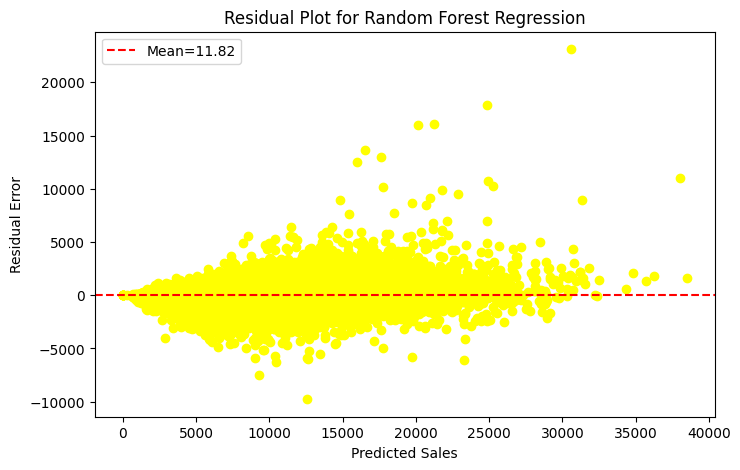

In [145]:
# creating a residual plot by first transfroming the square root back to original values
residuals = (y_test**2) - (y_test_rf_pred**2)
res_mean=residuals.mean().round(2)
plt.figure(figsize=(8,5))
plt.scatter((y_test**2), residuals,c="yellow")
plt.title("Residual Plot for Random Forest Regression")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [147]:
# Create a Decision Tree Regressor
rf_grid_regressor = RandomForestRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100],
    'max_depth': [10,15],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(rf_grid_regressor, param_grid, scoring='neg_mean_squared_error', cv=3)

# Fit the grid search to the training data
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [1, 2],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error')

In [148]:
# Predict on the model

# Get the best estimator (fitted model with the best parameters)
best_grid_rf_model = grid_rf.best_estimator_

# Get the best parameters
best_grid_rf_parameters = grid_rf.best_params_

# Get the mean squared error (MSE) of the best model on the validation data
best_grid_rf_mse = -grid_rf.best_score_

# Make train predictions using the best model
y_train_grid_rf_pred = best_grid_rf_model.predict(X_train)

# Make test predictions using the best model
y_test_grid_rf_pred = best_grid_rf_model.predict(X_test)

# Evaluate the best model (e.g., using mean squared error)
grid_rf_mse = mean_squared_error(y_test, y_test_grid_rf_pred)

print("Best parameters:", best_grid_rf_parameters)
print("Best MSE on validation data:", best_grid_rf_mse)
print("MSE on the entire dataset using the best model:", grid_rf_mse)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 100}
Best MSE on validation data: 16.717690843076102
MSE on the entire dataset using the best model: 16.315856538787294


In [149]:
# Calculating evaluation Metric Score chart
evaluation_metric('Random Forest GridSearch',y_train, y_train_grid_rf_pred, y_test, y_test_grid_rf_pred)

Accuracy Metric for Random Forest GridSearch
--------------------------------------------------
MAE on train is: 466.2456195975419
MAE on test is: 507.7495924523897
--------------------------------------------------
MSE on train is: 442192.8205935958
MSE on test is: 531292.5985906668
--------------------------------------------------
RMSE on train is: 664.9758045174244
RMSE on test is: 728.8982086619961
--------------------------------------------------
MAPE on train is: 6.706043212533946  %
MAPE on test is: 7.2878222295350685  %
--------------------------------------------------
R2 on train is: 0.9540861874745075
R2 on test is: 0.9449824830295901
--------------------------------------------------
Accuracy of train is: 93.29395678746606  %
Accuracy of test is: 92.71217777046493  %
--------------------------------------------------


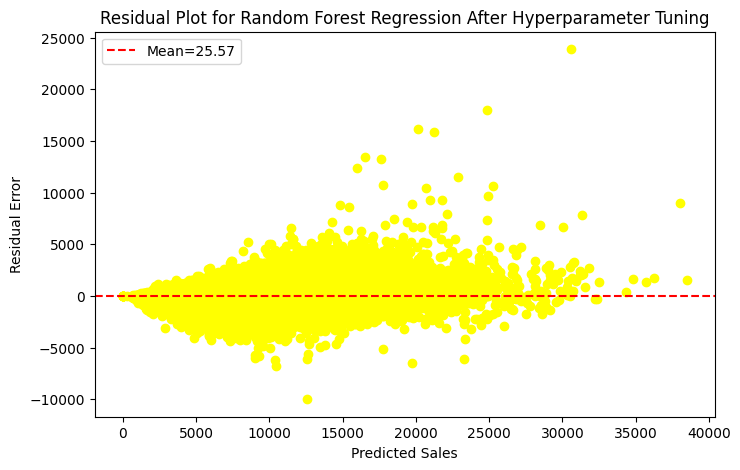

In [150]:
# creating a residual plot by first transfroming the square root back to original values
residuals = (y_test**2) - (y_test_grid_rf_pred**2)
res_mean=residuals.mean().round(2)
plt.figure(figsize=(8,5))
plt.scatter((y_test**2), residuals,c="yellow")
plt.title("Residual Plot for Random Forest Regression After Hyperparameter Tuning")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using Random Forest Regression, the r2 score improved to 0.96 and accuracy improved to 94.7%

RMSE and MAPE is also reducing gradually as we are using ensemble of Decision trees that is Bootstrap Aggregation(Bagging) so it is giving equal preference each of the feature while spliting.

### ML Model - 5
**XGBoost Regression**

In [152]:
# import the Decision Tree regressor
from xgboost import XGBRegressor

# create a regressor object
xgb_regressor = XGBRegressor(learning_rate=0.2, max_depth=12)

# fit the regressor with X and Y data
xgb_regressor.fit(X_train, y_train)

# predict on model
y_train_xgb_pred= xgb_regressor.predict(X_train)
y_test_xgb_pred= xgb_regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [153]:
# Calculating evaluation Metric Score chart
evaluation_metric('XGBoost',y_train, y_train_xgb_pred, y_test, y_test_xgb_pred)

Accuracy Metric for XGBoost
--------------------------------------------------
MAE on train is: 260.88084333500393
MAE on test is: 327.74127469223
--------------------------------------------------
MSE on train is: 137581.0148516284
MSE on test is: 233985.6970313019
--------------------------------------------------
RMSE on train is: 370.9191486720905
RMSE on test is: 483.72068079760857
--------------------------------------------------
MAPE on train is: 3.752267335480739  %
MAPE on test is: 4.704130112053527  %
--------------------------------------------------
R2 on train is: 0.9857146732629332
R2 on test is: 0.9757698260969544
--------------------------------------------------
Accuracy of train is: 96.24773266451926  %
Accuracy of test is: 95.29586988794648  %
--------------------------------------------------


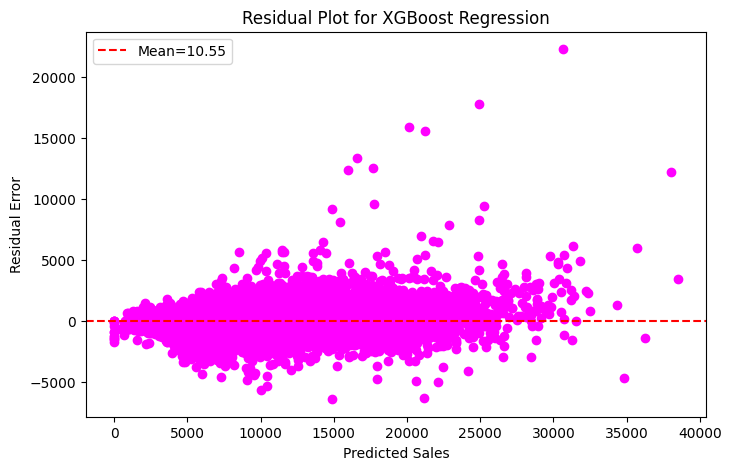

In [154]:
# creating a residual plot by first transfroming the square root back to original values
residuals = (y_test**2) - (y_test_xgb_pred**2)
res_mean=residuals.mean().round(2)
plt.figure(figsize=(8,5))
plt.scatter((y_test**2), residuals,c="magenta")
plt.title("Residual Plot for XGBoost Regression")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [156]:
# Create a Decision Tree Regressor
xgb_regressor_grid = XGBRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [9, 12],
    'min_child_weight': [1, 2]
}

# Initialize GridSearchCV
grid_xgb = GridSearchCV(xgb_regressor_grid, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=3)

# Fit the grid search to the training data
grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END learning_rate=0.1, max_depth=9, min_child_weight=1;, score=-13.178 total time=   9.0s
[CV 2/3] END learning_rate=0.1, max_depth=9, min_child_weight=1;, score=-13.292 total time=   9.5s
[CV 3/3] END learning_rate=0.1, max_depth=9, min_child_weight=1;, score=-13.376 total time=   6.5s
[CV 1/3] END learning_rate=0.1, max_depth=9, min_child_weight=2;, score=-12.805 total time=   9.6s
[CV 2/3] END learning_rate=0.1, max_depth=9, min_child_weight=2;, score=-13.138 total time=   7.0s
[CV 3/3] END learning_rate=0.1, max_depth=9, min_child_weight=2;, score=-13.295 total time=   8.8s
[CV 1/3] END learning_rate=0.1, max_depth=12, min_child_weight=1;, score=-8.810 total time=  15.9s
[CV 2/3] END learning_rate=0.1, max_depth=12, min_child_weight=1;, score=-9.121 total time=  16.0s
[CV 3/3] END learning_rate=0.1, max_depth=12, min_child_weight=1;, score=-9.286 total time=  19.1s
[CV 1/3] END learning_rate=0.1, max_depth=12, min

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [9, 12],
                         'min_child_weight': [1, 2]},
             scoring='neg_mean_squared_error', verbose=3)

In [157]:
# Predict on the model

# Get the best estimator (fitted model with the best parameters)
best_grid_xgb_model = grid_xgb.best_estimator_

# Get the best parameters
best_grid_xgb_parameters = grid_xgb.best_params_

# Get the mean squared error (MSE) of the best model on the validation data
best_grid_xgb_mse = -grid_xgb.best_score_

# Make train predictions using the best model
y_train_grid_xgb_pred = best_grid_xgb_model.predict(X_train)

# Make test predictions using the best model
y_test_grid_xgb_pred = best_grid_xgb_model.predict(X_test)

# Evaluate the best model (e.g., using mean squared error)
grid_xgb_mse = mean_squared_error(y_test, y_test_grid_xgb_pred)

print("Best parameters:", best_grid_xgb_parameters)
print("Best MSE on validation data:", best_grid_xgb_mse)
print("MSE on the entire dataset using the best model:", grid_xgb_mse)

Best parameters: {'learning_rate': 0.2, 'max_depth': 12, 'min_child_weight': 2}
Best MSE on validation data: 7.729443455795515
MSE on the entire dataset using the best model: 7.339368163421346


In [158]:
# Calculating evaluation Metric Score chart
evaluation_metric('XGBoost GridSearch',y_train, y_train_grid_xgb_pred, y_test, y_test_grid_xgb_pred)

Accuracy Metric for XGBoost GridSearch
--------------------------------------------------
MAE on train is: 265.3775306892996
MAE on test is: 329.98806174015914
--------------------------------------------------
MSE on train is: 142740.92047427132
MSE on test is: 237273.28455453934
--------------------------------------------------
RMSE on train is: 377.81069396494235
RMSE on test is: 487.10705656409795
--------------------------------------------------
MAPE on train is: 3.8169435028132948  %
MAPE on test is: 4.73637865510768  %
--------------------------------------------------
R2 on train is: 0.9851789093871443
R2 on test is: 0.975429382991157
--------------------------------------------------
Accuracy of train is: 96.18305649718671  %
Accuracy of test is: 95.26362134489231  %
--------------------------------------------------


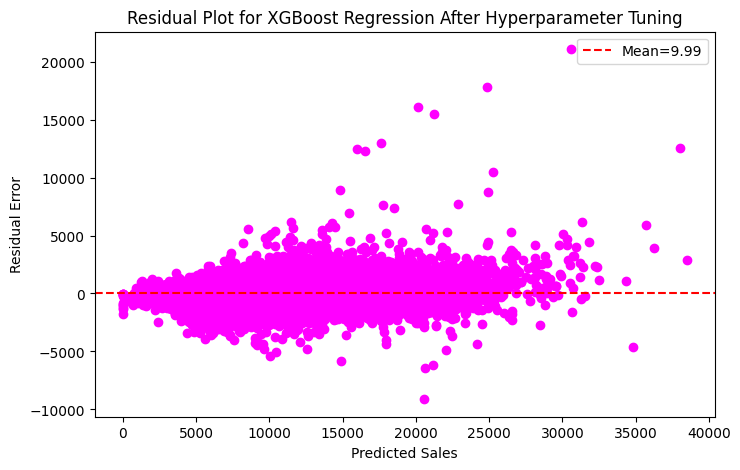

In [159]:
# creating a residual plot by first transfroming the square root back to original values
residuals = (y_test**2) - (y_test_grid_xgb_pred**2)
res_mean=residuals.mean().round(2)
plt.figure(figsize=(8,5))
plt.scatter((y_test**2), residuals,c="magenta")
plt.title("Residual Plot for XGBoost Regression After Hyperparameter Tuning")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

XGboost is a heavy algorithm and takes much processing time with GridSearchCV. So, tuning of hyperparameter with GridSearchCV was a bit complicated task for us but we have used less parameterts in GridSearchCV because we did'nt want to miss the best parameter combination.

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be {'learning_rate': 0.2, 'max_depth': 12, 'min_child_weight': 2} which resulted into the improvement of matrix scores.

In [160]:
#check the evaluation matrix for all models
accuracy_df

,Model_Name,MAE_train,MAE_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test,r2_train,r2_test,Accuracy_%_train,Accuracy_%_test
0,Linear Regression,868.8737,870.8779,1197.3752,1202.2871,12.4971,12.4999,0.8511,0.8503,87.5029,87.5001
1,Ridge Regression,868.8736,870.8778,1197.3752,1202.2870,12.4971,12.4999,0.8511,0.8503,87.5029,87.5001
2,Elastic Net,868.8733,870.8775,1197.3752,1202.2868,12.4971,12.4999,0.8511,0.8503,87.5029,87.5001
3,Decision Tree,457.8153,537.4871,678.4870,791.8058,6.5848,7.7146,0.9522,0.9351,93.4152,92.2854
4,Decision Tree GridSearch,307.8329,443.7100,478.1936,682.3763,4.4276,6.3686,0.9763,0.9518,95.5724,93.6314
5,Random Forest,137.5637,364.5912,214.6103,553.8482,1.9786,5.2330,0.9952,0.9682,98.0214,94.7670
6,Random Forest GridSearch,466.2456,507.7496,664.9758,728.8982,6.7060,7.2878,0.9541,0.9450,93.2940,92.7122
7,XGBoost,260.8808,327.7413,370.9191,483.7207,3.7523,4.7041,0.9857,0.9758,96.2477,95.2959
8,XGBoost GridSearch,265.3775,329.9881,377.8107,487.1071,3.8169,4.7364,0.9852,0.9754,96.1831,95.2636


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***